# Sampling and Recovery of Graph Signals

reference:  [P. Di Lorenzo, S. Barbarossa, and P. Banelli, Sampling and Recovery of Graph Signals](https://arxiv.org/abs/1712.09310)

In [2]:
import matplotlib.pyplot as plt 
import networkx as nx
from scipy import io
import pandas as pd
import numpy as np
import scipy
import json

In [3]:
from cvxpy import *

In [4]:
from lib import *

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
%matplotlib inline

In [7]:
A=scipy.io.loadmat("./A1.mat")["A1"]

In [8]:
xy=scipy.io.loadmat("./xy.mat")["xy"]
y=scipy.io.loadmat("./y.mat")["y"]

##  the main goal of this work is to reconstruct a signal over a graph

### Notation

 * $x \in R^N$  signal
 * $D_S \in R^{N\,x\,N}$      sampling matrix
 * $P_S \in R^{N \, x \, S}$ sampling selection matrix
 * $U \in R^{N \,x\, N}$  matrix eigenvalues L
 * $U_F \in R^{N \, x \, F}$ matrix eigenvalues for related frequencies
 * $B_F = U_F U_F^T$      band-limiting operator
 * $s = U^T x $           graph Fourier transform

To perfectly reconstruct a signal x from a sample r
$$ r = D_s x $$
we need a F-bandlimited signal
$$ B x = x $$
and to check the recovery condition
$$ || D_{sc} B || < 1$$

given a sample, we want to solve

$$ \bar{s} = Q\, r = Q \,(D_s x) = Q \, (I - D_{sc}) x = Q \, (I - D_{sc} B) x$$

where $D_{sc} = I - D_{s}$ the last equation is valid because the signal is band limited.
So, to perfect recovery ($\bar{s} = s)$, we need 

$$ Q = (I - D_{sc} B)^{-1}$$

and this inverse exists if and only if the recovery condition is satisfied and the bigger singular value of the matrix $ D_{sc}B $ is smaller than one.

### compute Laplacian and eigenvectors

In [9]:
L, U, lambdas, Px, Py, y, graph_A = preprocess(A, xy, y)

### plot signal over graph

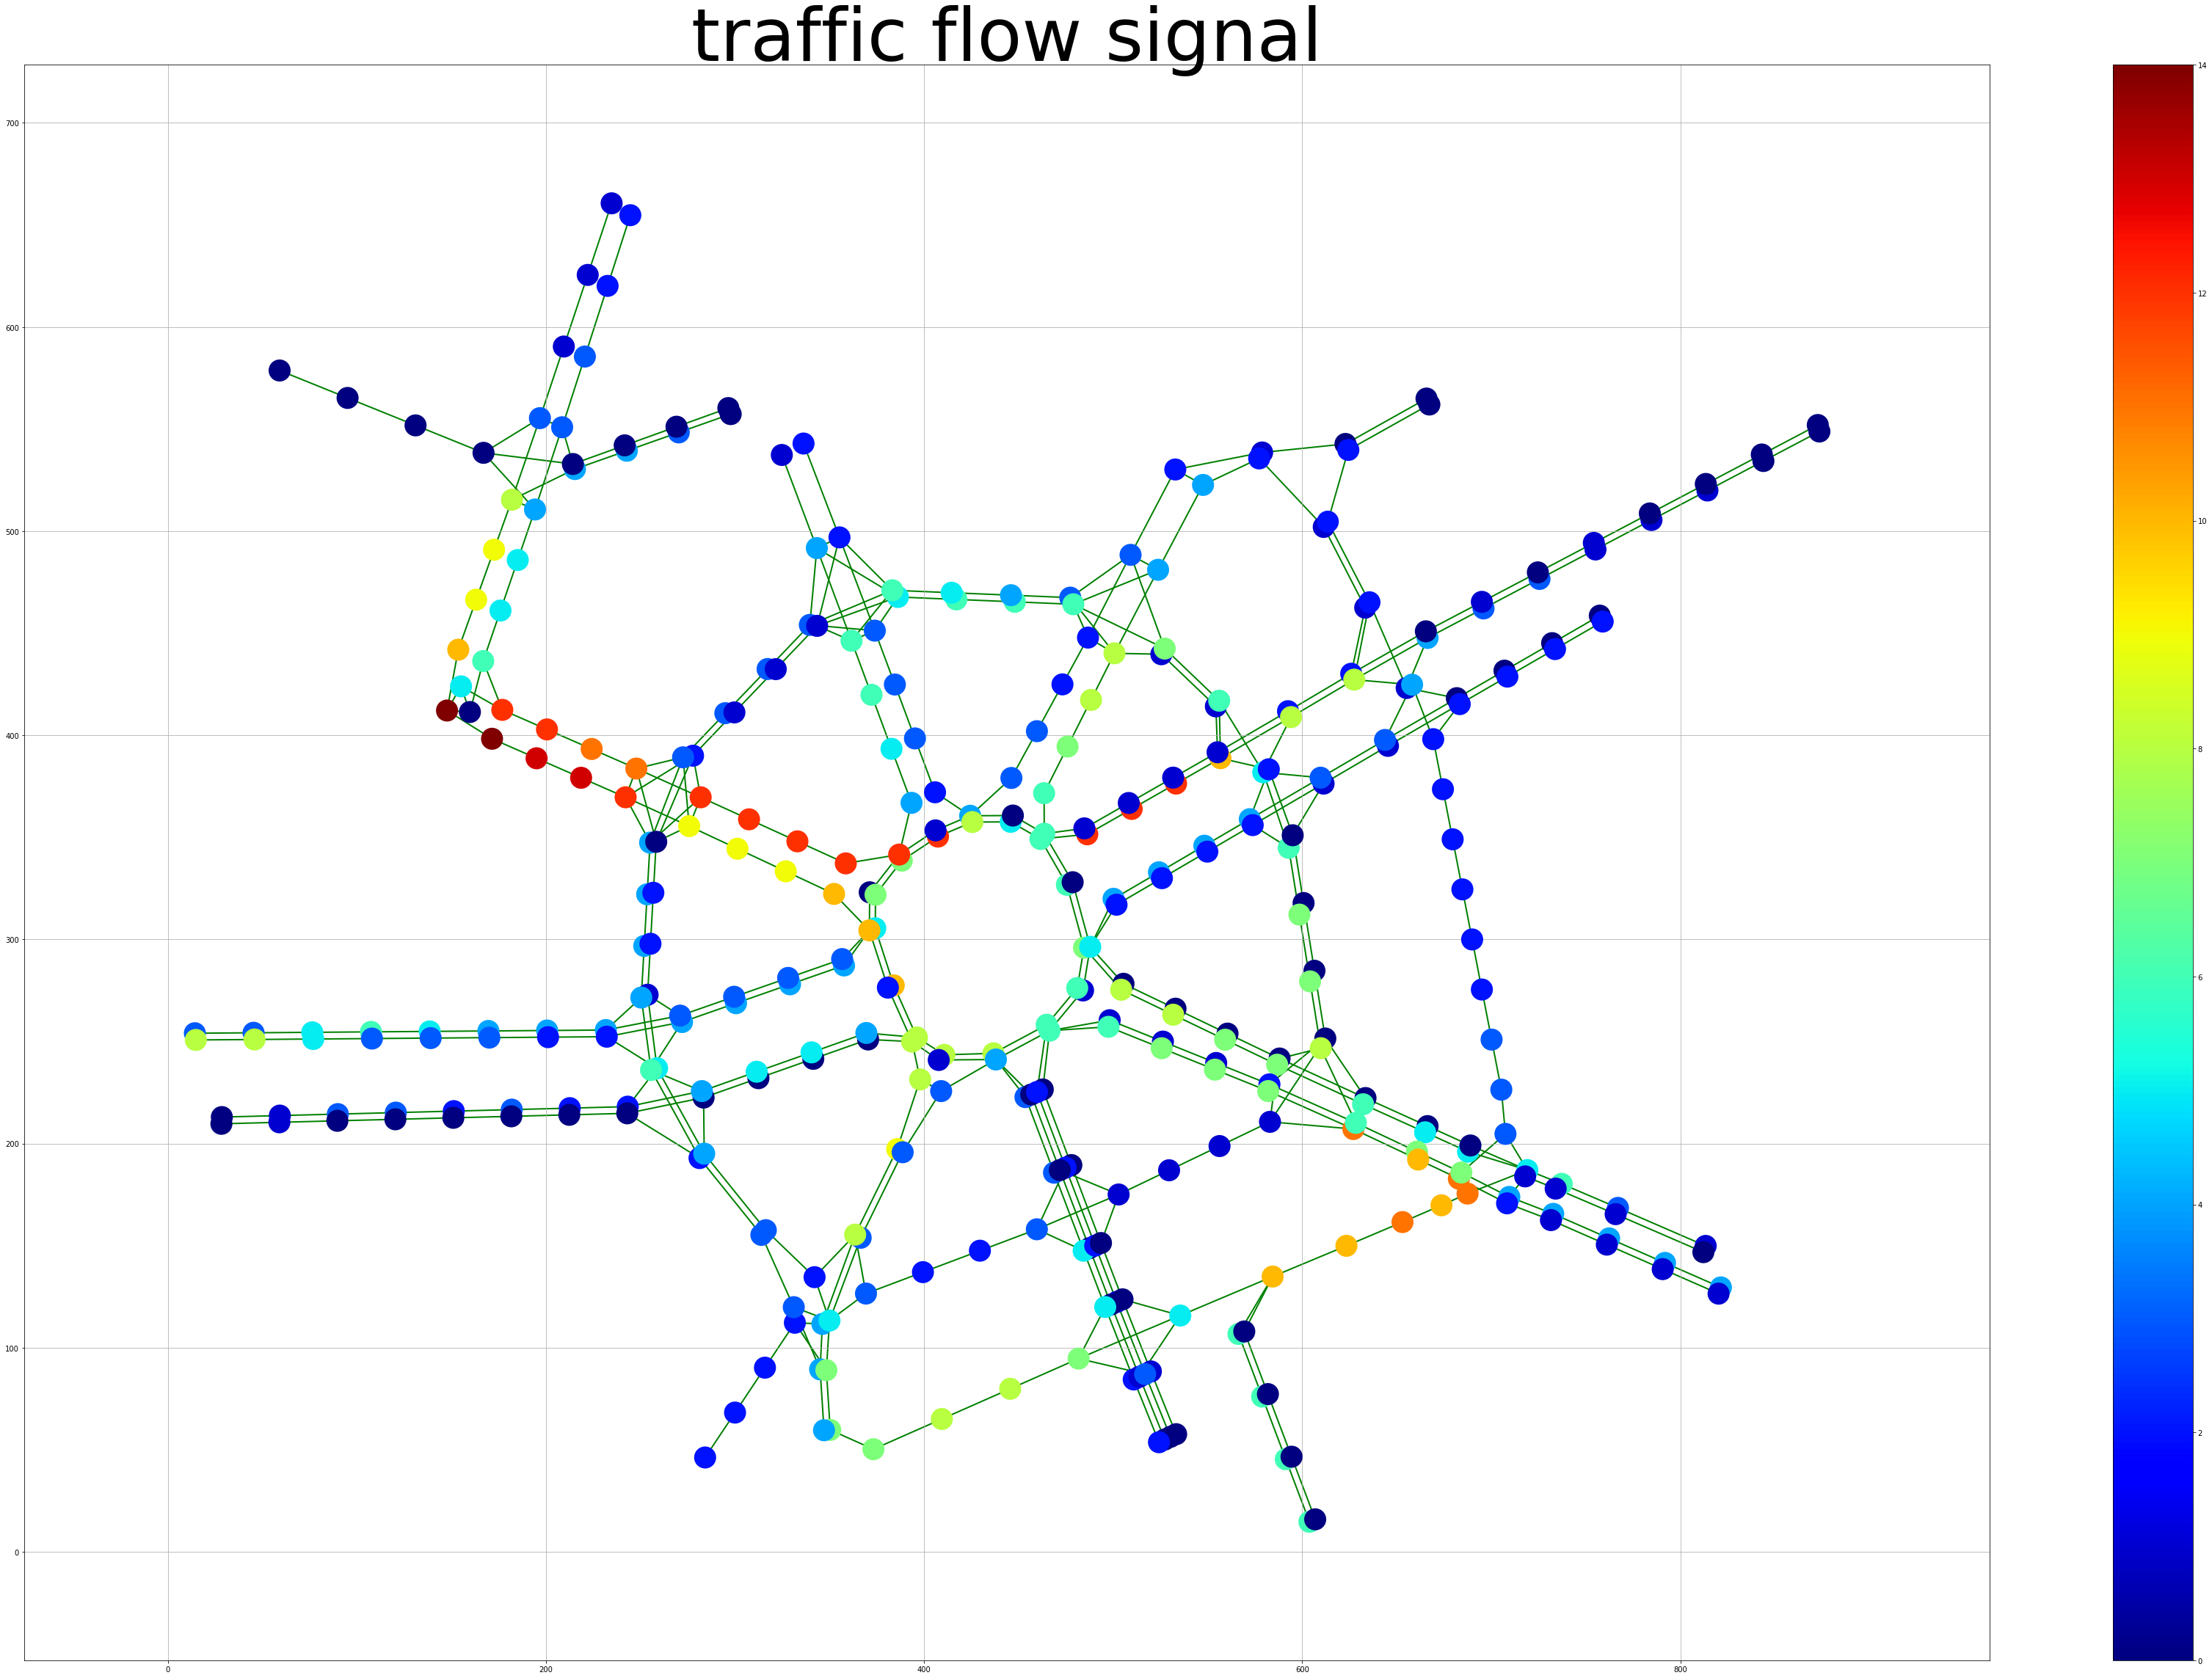

In [10]:
plt.figure(figsize=(60,40))
c_min=min(y)
c_max=max(y)
nx.draw_networkx(graph_A, pos=xy, arrows=True, with_labels=False, edge_color="green", node_color=y, node_size=400, node_shape="o", font_size=30,
                    linewidths =10, width=2, cmap=plt.cm.jet, vmin=c_min, vmax=c_max)
    
cmap=plt.cm.jet
vmin = c_min
vmax = c_max
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array(y)
plt.colorbar(sm)
plt.grid()
plt.title("traffic flow signal", fontsize=100)
plt.show()

### plot signal

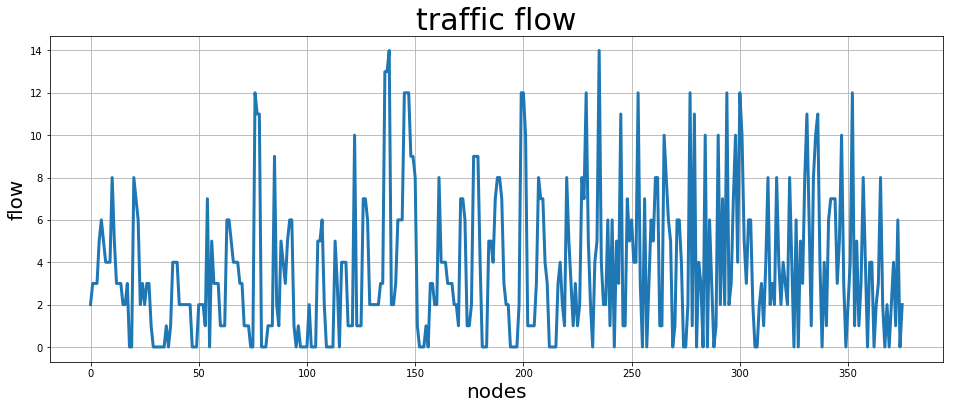

In [311]:
plt.figure(figsize=(16,6))
plt.plot(y, linewidth=3)
plt.title("traffic flow", fontsize=30)
plt.xlabel("nodes", fontsize=20)
plt.ylabel("flow", fontsize=20)
plt.grid()

### distribution signal over nodes

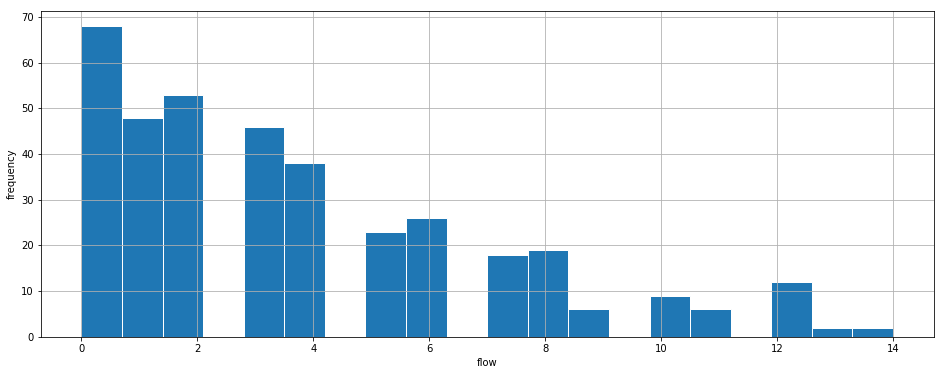

In [315]:
plt.figure(figsize=(16,6))
plt.hist(y, bins=20, edgecolor='white')
plt.ylabel("frequency")
plt.xlabel("flow")
plt.grid()

### empiric method to choose the best number of clusters

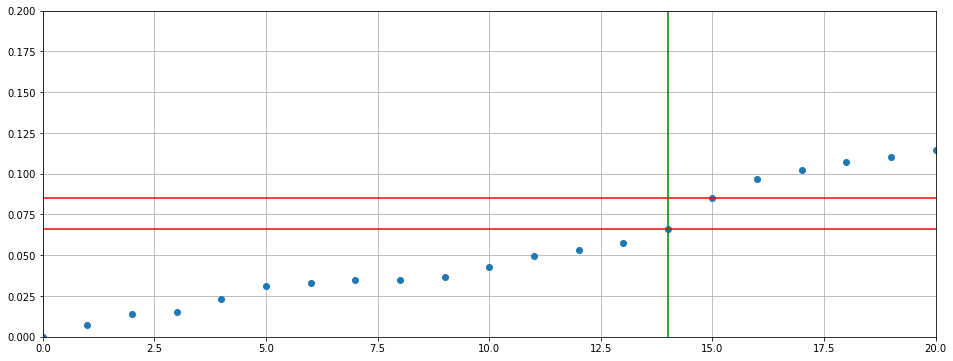

In [301]:
plt.figure(figsize=(16,6))
plt.plot(lambdas, "o")
plt.ylim([0,0.2])
plt.axhline(lambdas[14], color="red")
plt.axhline(lambdas[15], color="red")
plt.axvline(14, color="green")
plt.xlim([0,20])
plt.grid()

### check first eigenvalue 

In [9]:
lambdas[0]

8.5586992030047146e-16

### check first eigenvector

In [293]:
U[:,0]

array([ 0.05157106,  0.05157106,  0.05157106,  0.05157106,  0.05157106,
        0.05157106,  0.05157106,  0.05157106,  0.05157106,  0.05157106,
        0.05157106,  0.05157106,  0.05157106,  0.05157106,  0.05157106,
        0.05157106,  0.05157106,  0.05157106,  0.05157106,  0.05157106,
        0.05157106,  0.05157106,  0.05157106,  0.05157106,  0.05157106,
        0.05157106,  0.05157106,  0.05157106,  0.05157106,  0.05157106,
        0.05157106,  0.05157106,  0.05157106,  0.05157106,  0.05157106,
        0.05157106,  0.05157106,  0.05157106,  0.05157106,  0.05157106,
        0.05157106,  0.05157106,  0.05157106,  0.05157106,  0.05157106,
        0.05157106,  0.05157106,  0.05157106,  0.05157106,  0.05157106,
        0.05157106,  0.05157106,  0.05157106,  0.05157106,  0.05157106,
        0.05157106,  0.05157106,  0.05157106,  0.05157106,  0.05157106,
        0.05157106,  0.05157106,  0.05157106,  0.05157106,  0.05157106,
        0.05157106,  0.05157106,  0.05157106,  0.05157106,  0.05

### clusterization

In [113]:
clusters, clusters2 = clustering_generator(U)

### clustering with second eigenvector

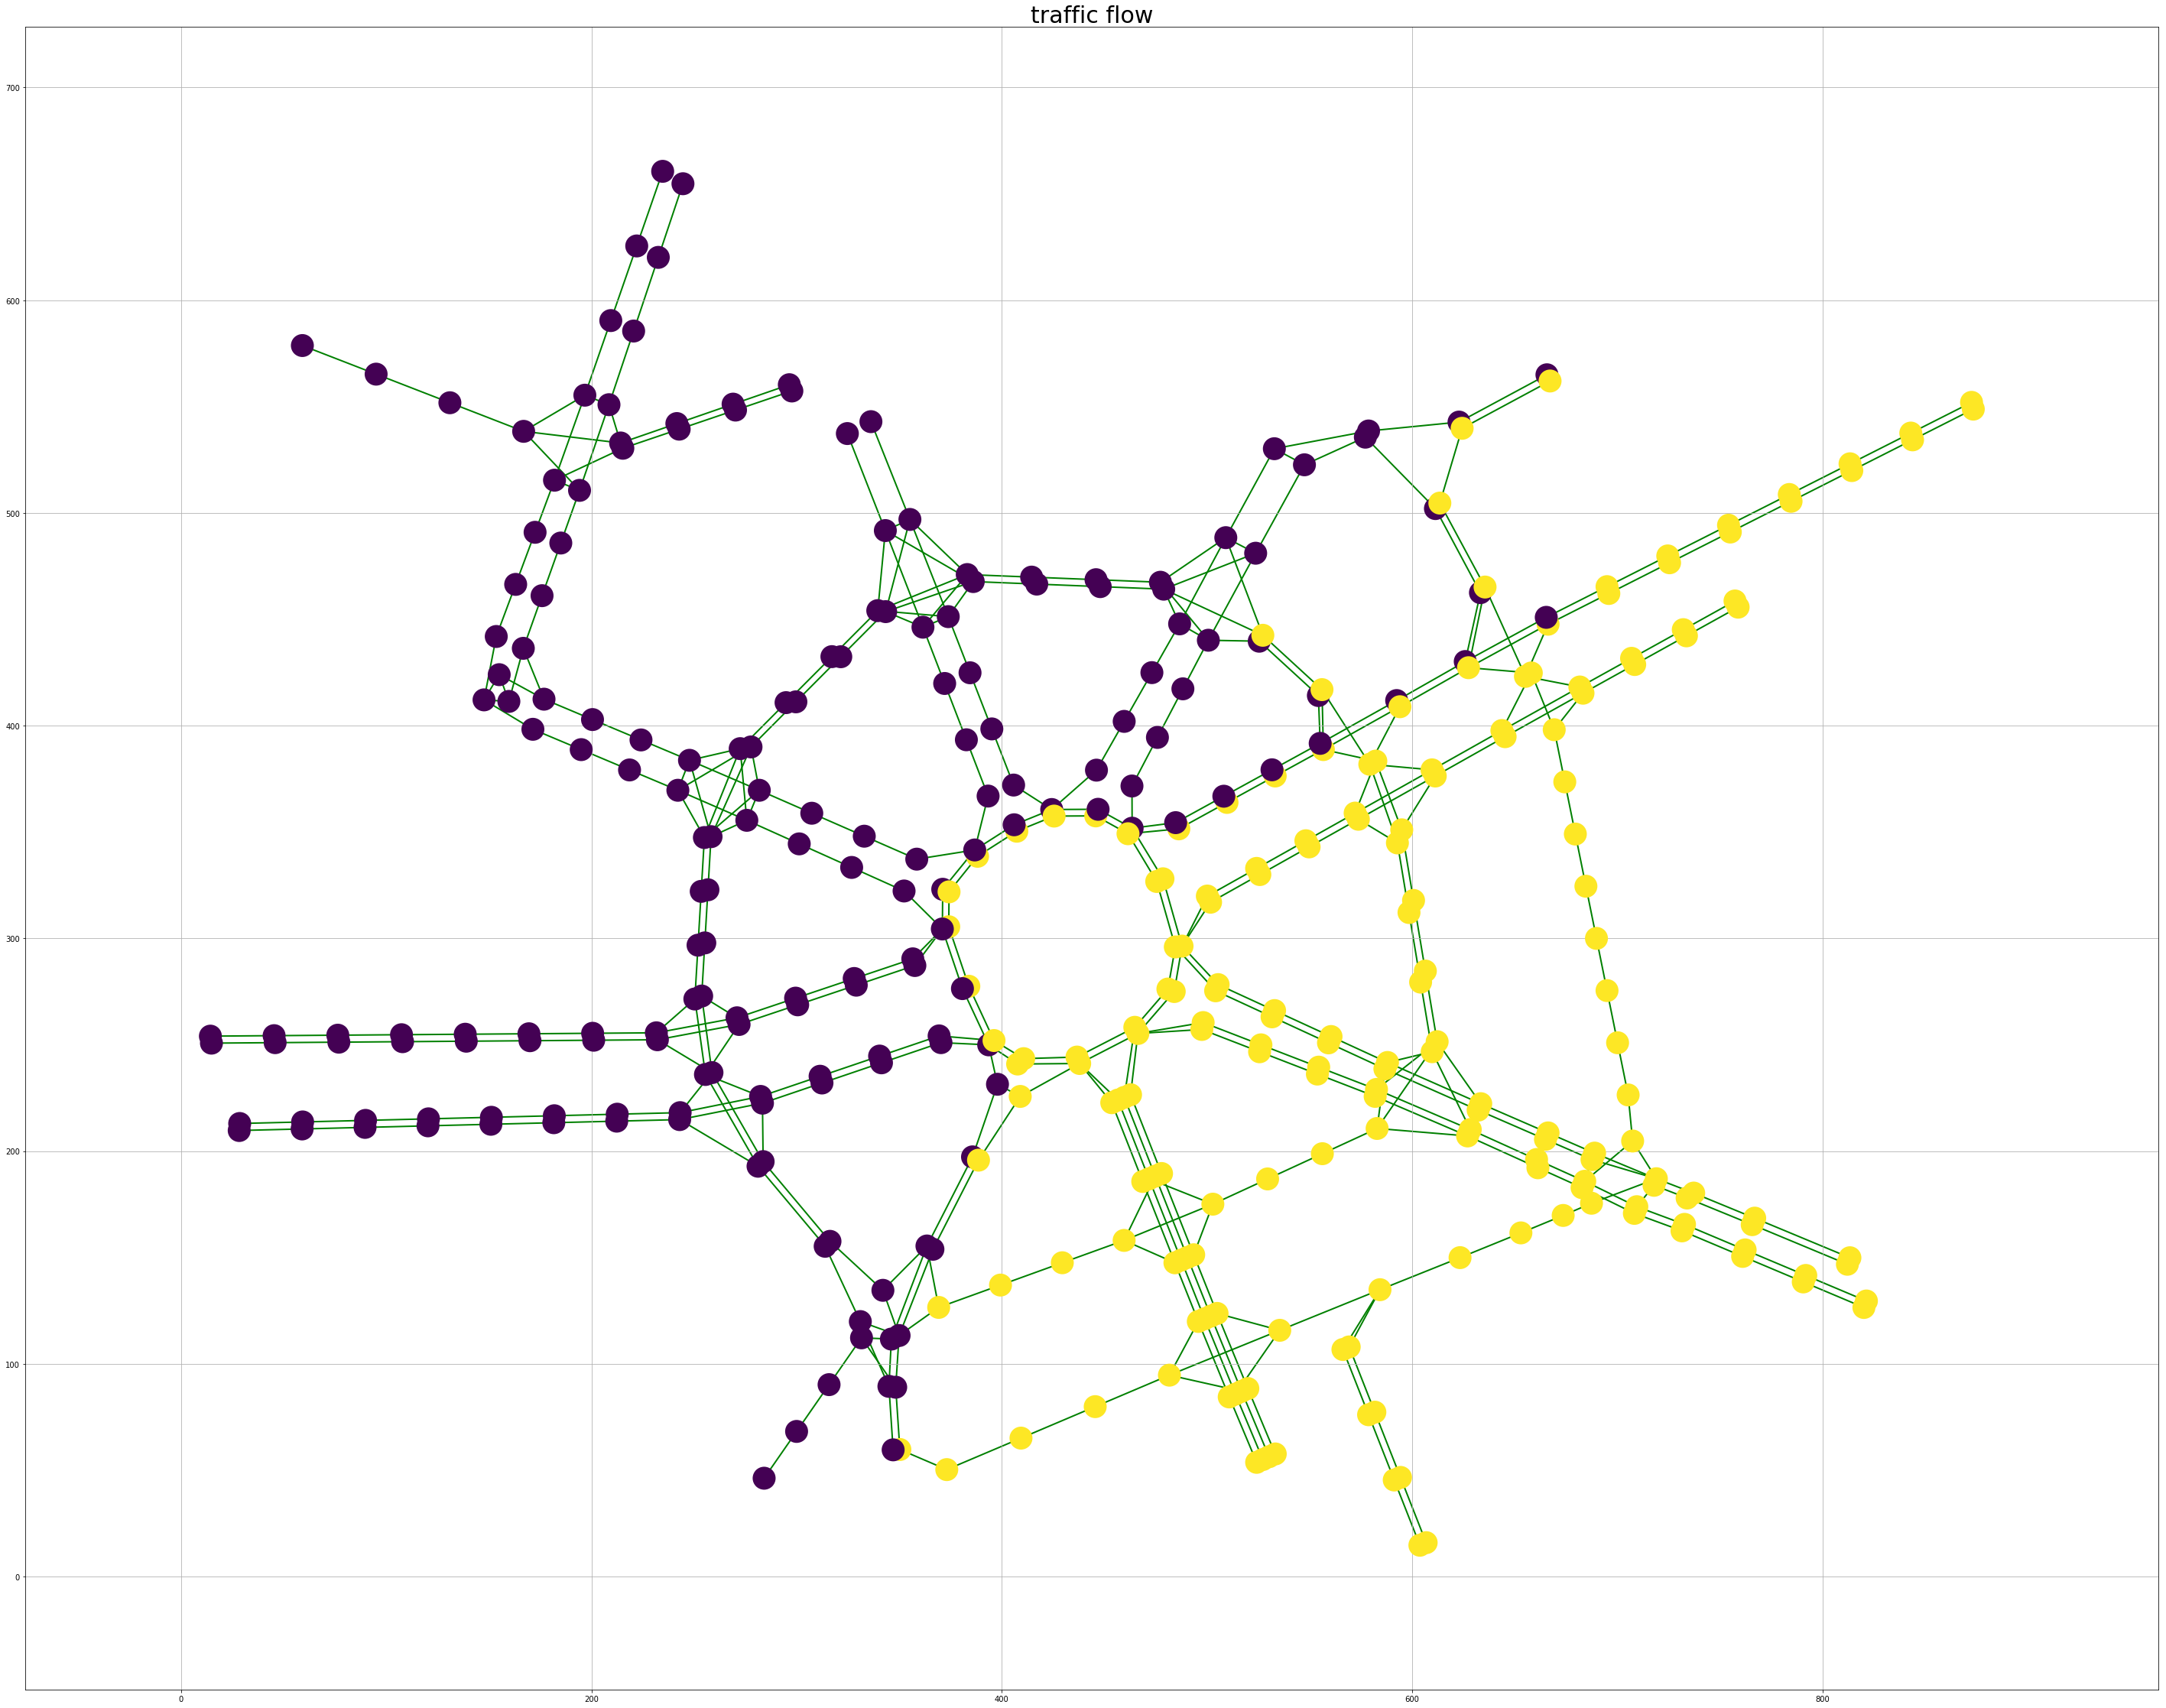

In [114]:
plt.figure(figsize=(50,40))
nx.draw_networkx(graph_A, pos=xy, arrows=True, with_labels=False, edge_color="green", node_color=clusters, node_size=400, node_shape="o", font_size=30,
                    linewidths =10, width=2)
    
plt.title("traffic flow", fontsize=30)
plt.grid()
plt.show()

### clustering with third eigenvector

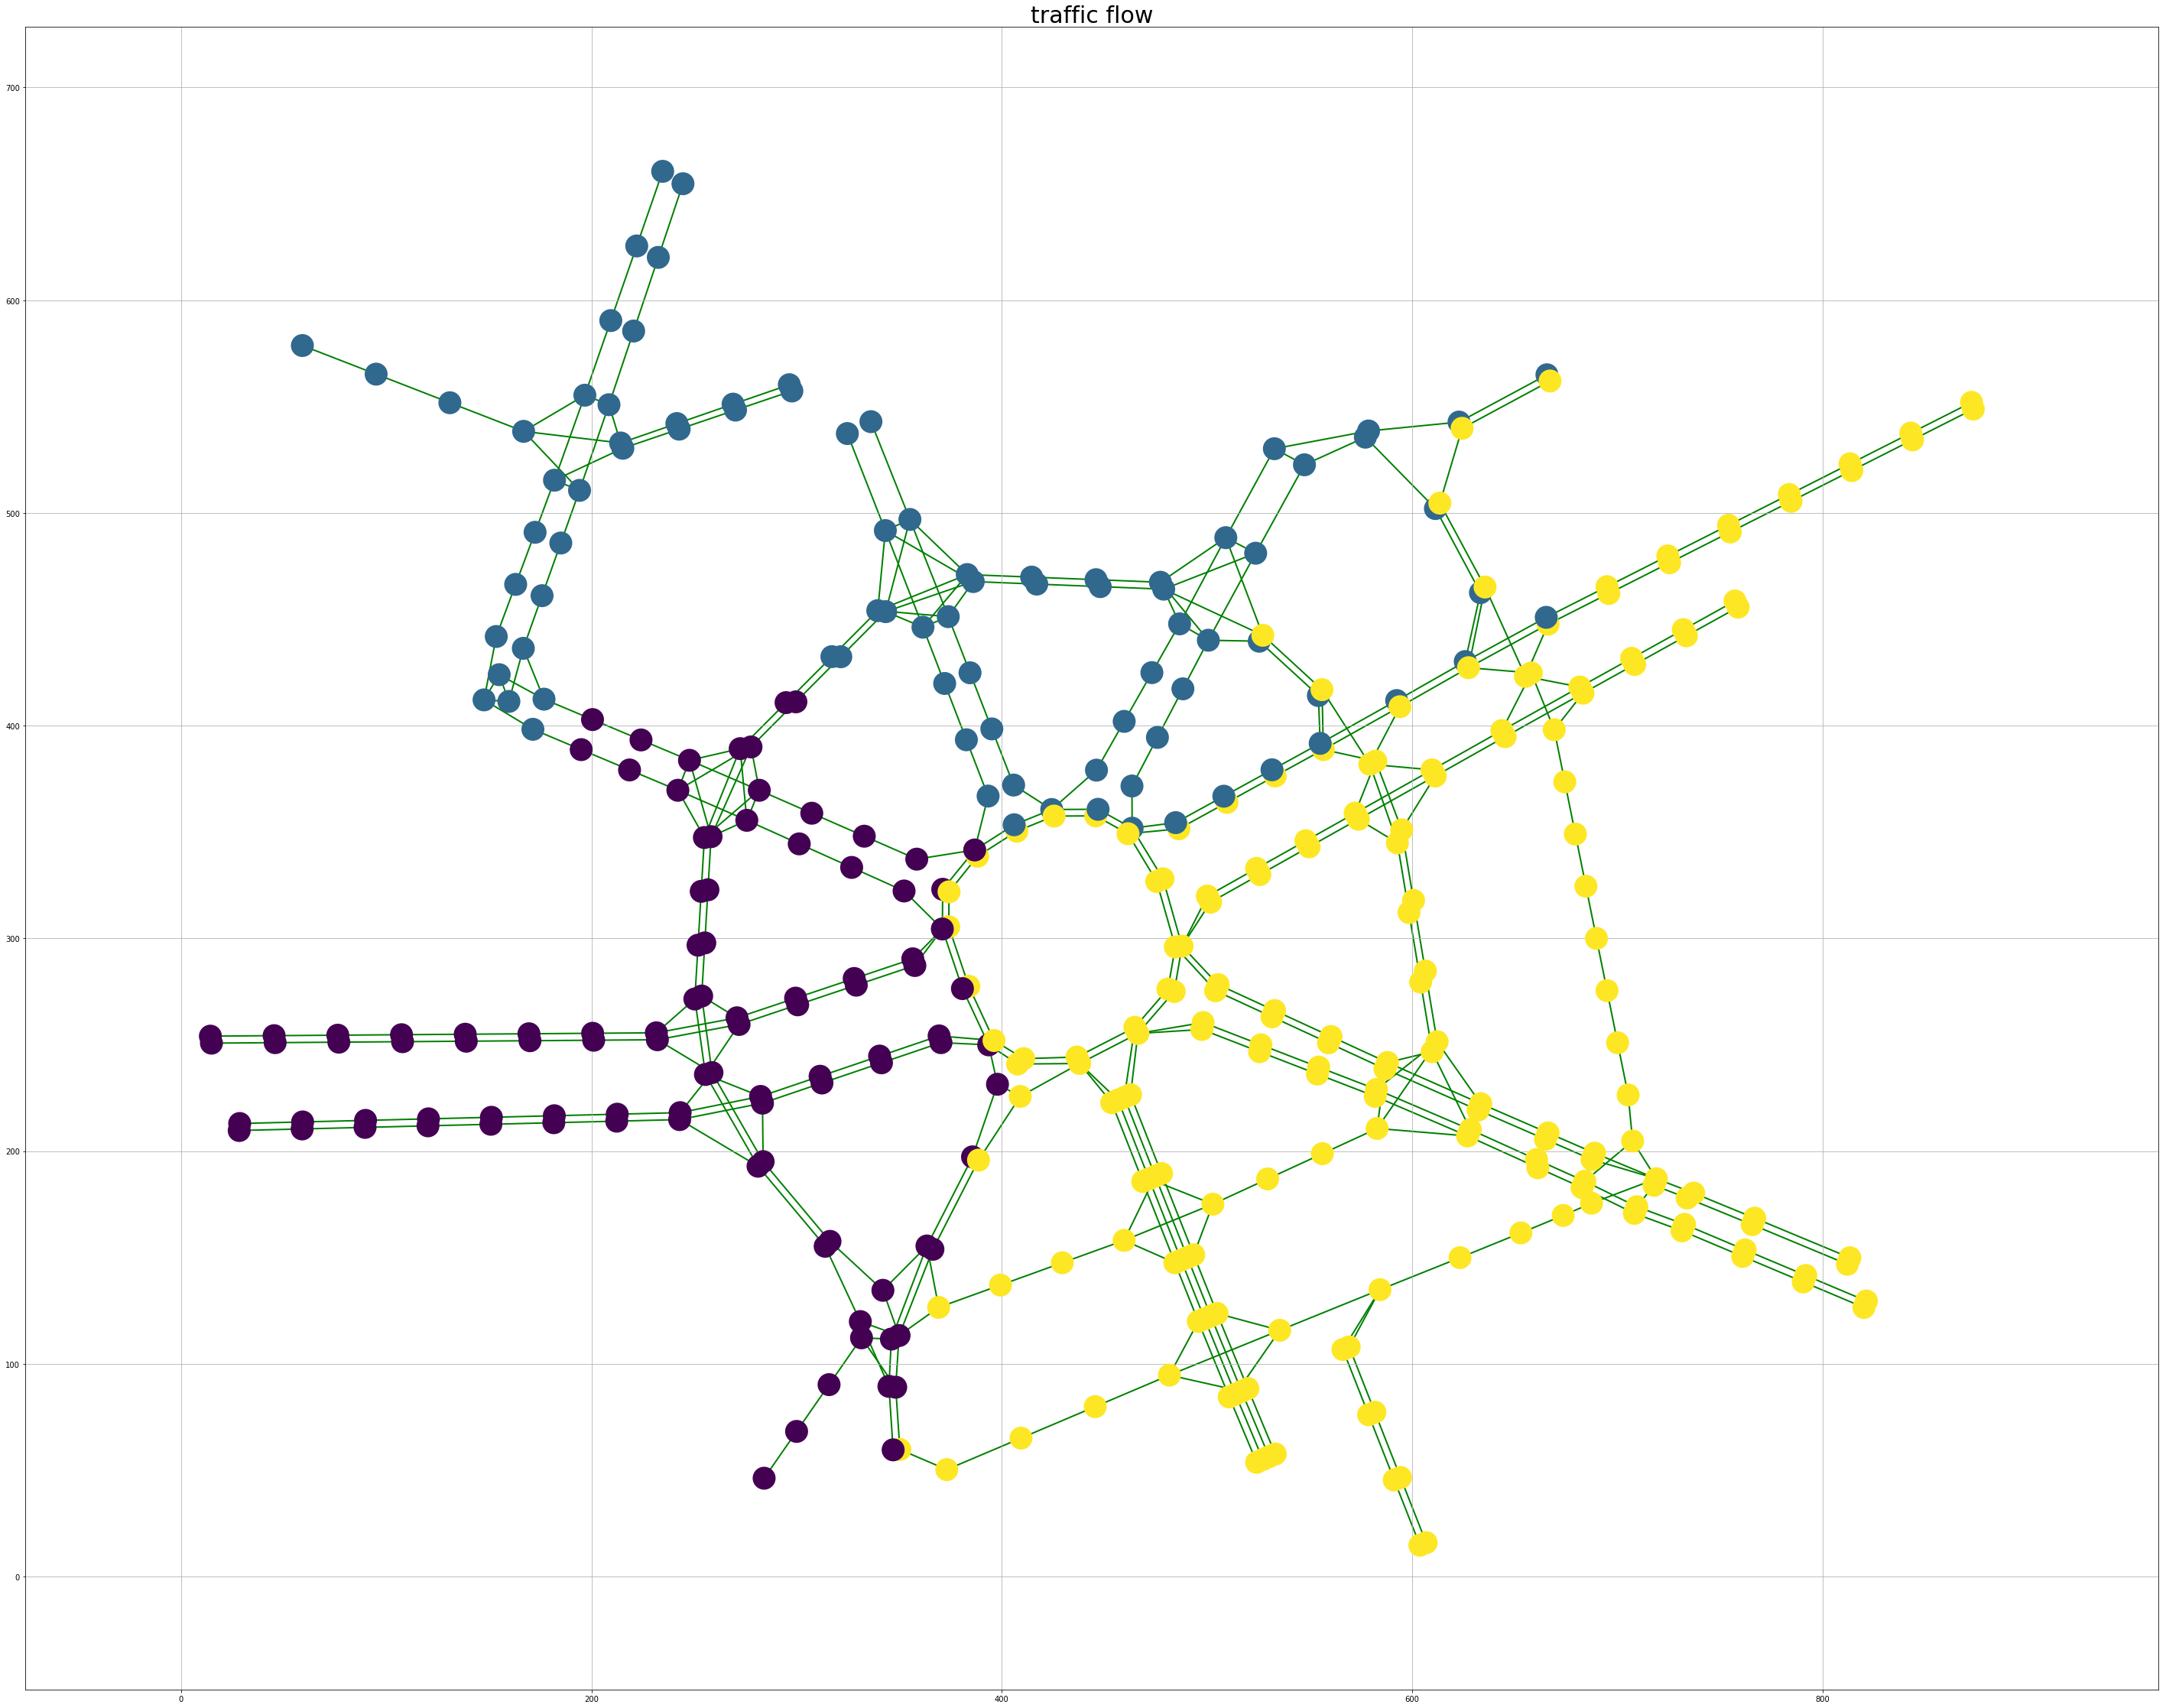

In [115]:
plt.figure(figsize=(50,40))
nx.draw_networkx(graph_A, pos=xy, arrows=True, with_labels=False, edge_color="green", node_color=clusters2, node_size=400, node_shape="o", font_size=30,
                    linewidths =10, width=2)
    
plt.title("traffic flow", fontsize=30)
plt.grid()
plt.show()

### clustering with "best" number of clusters

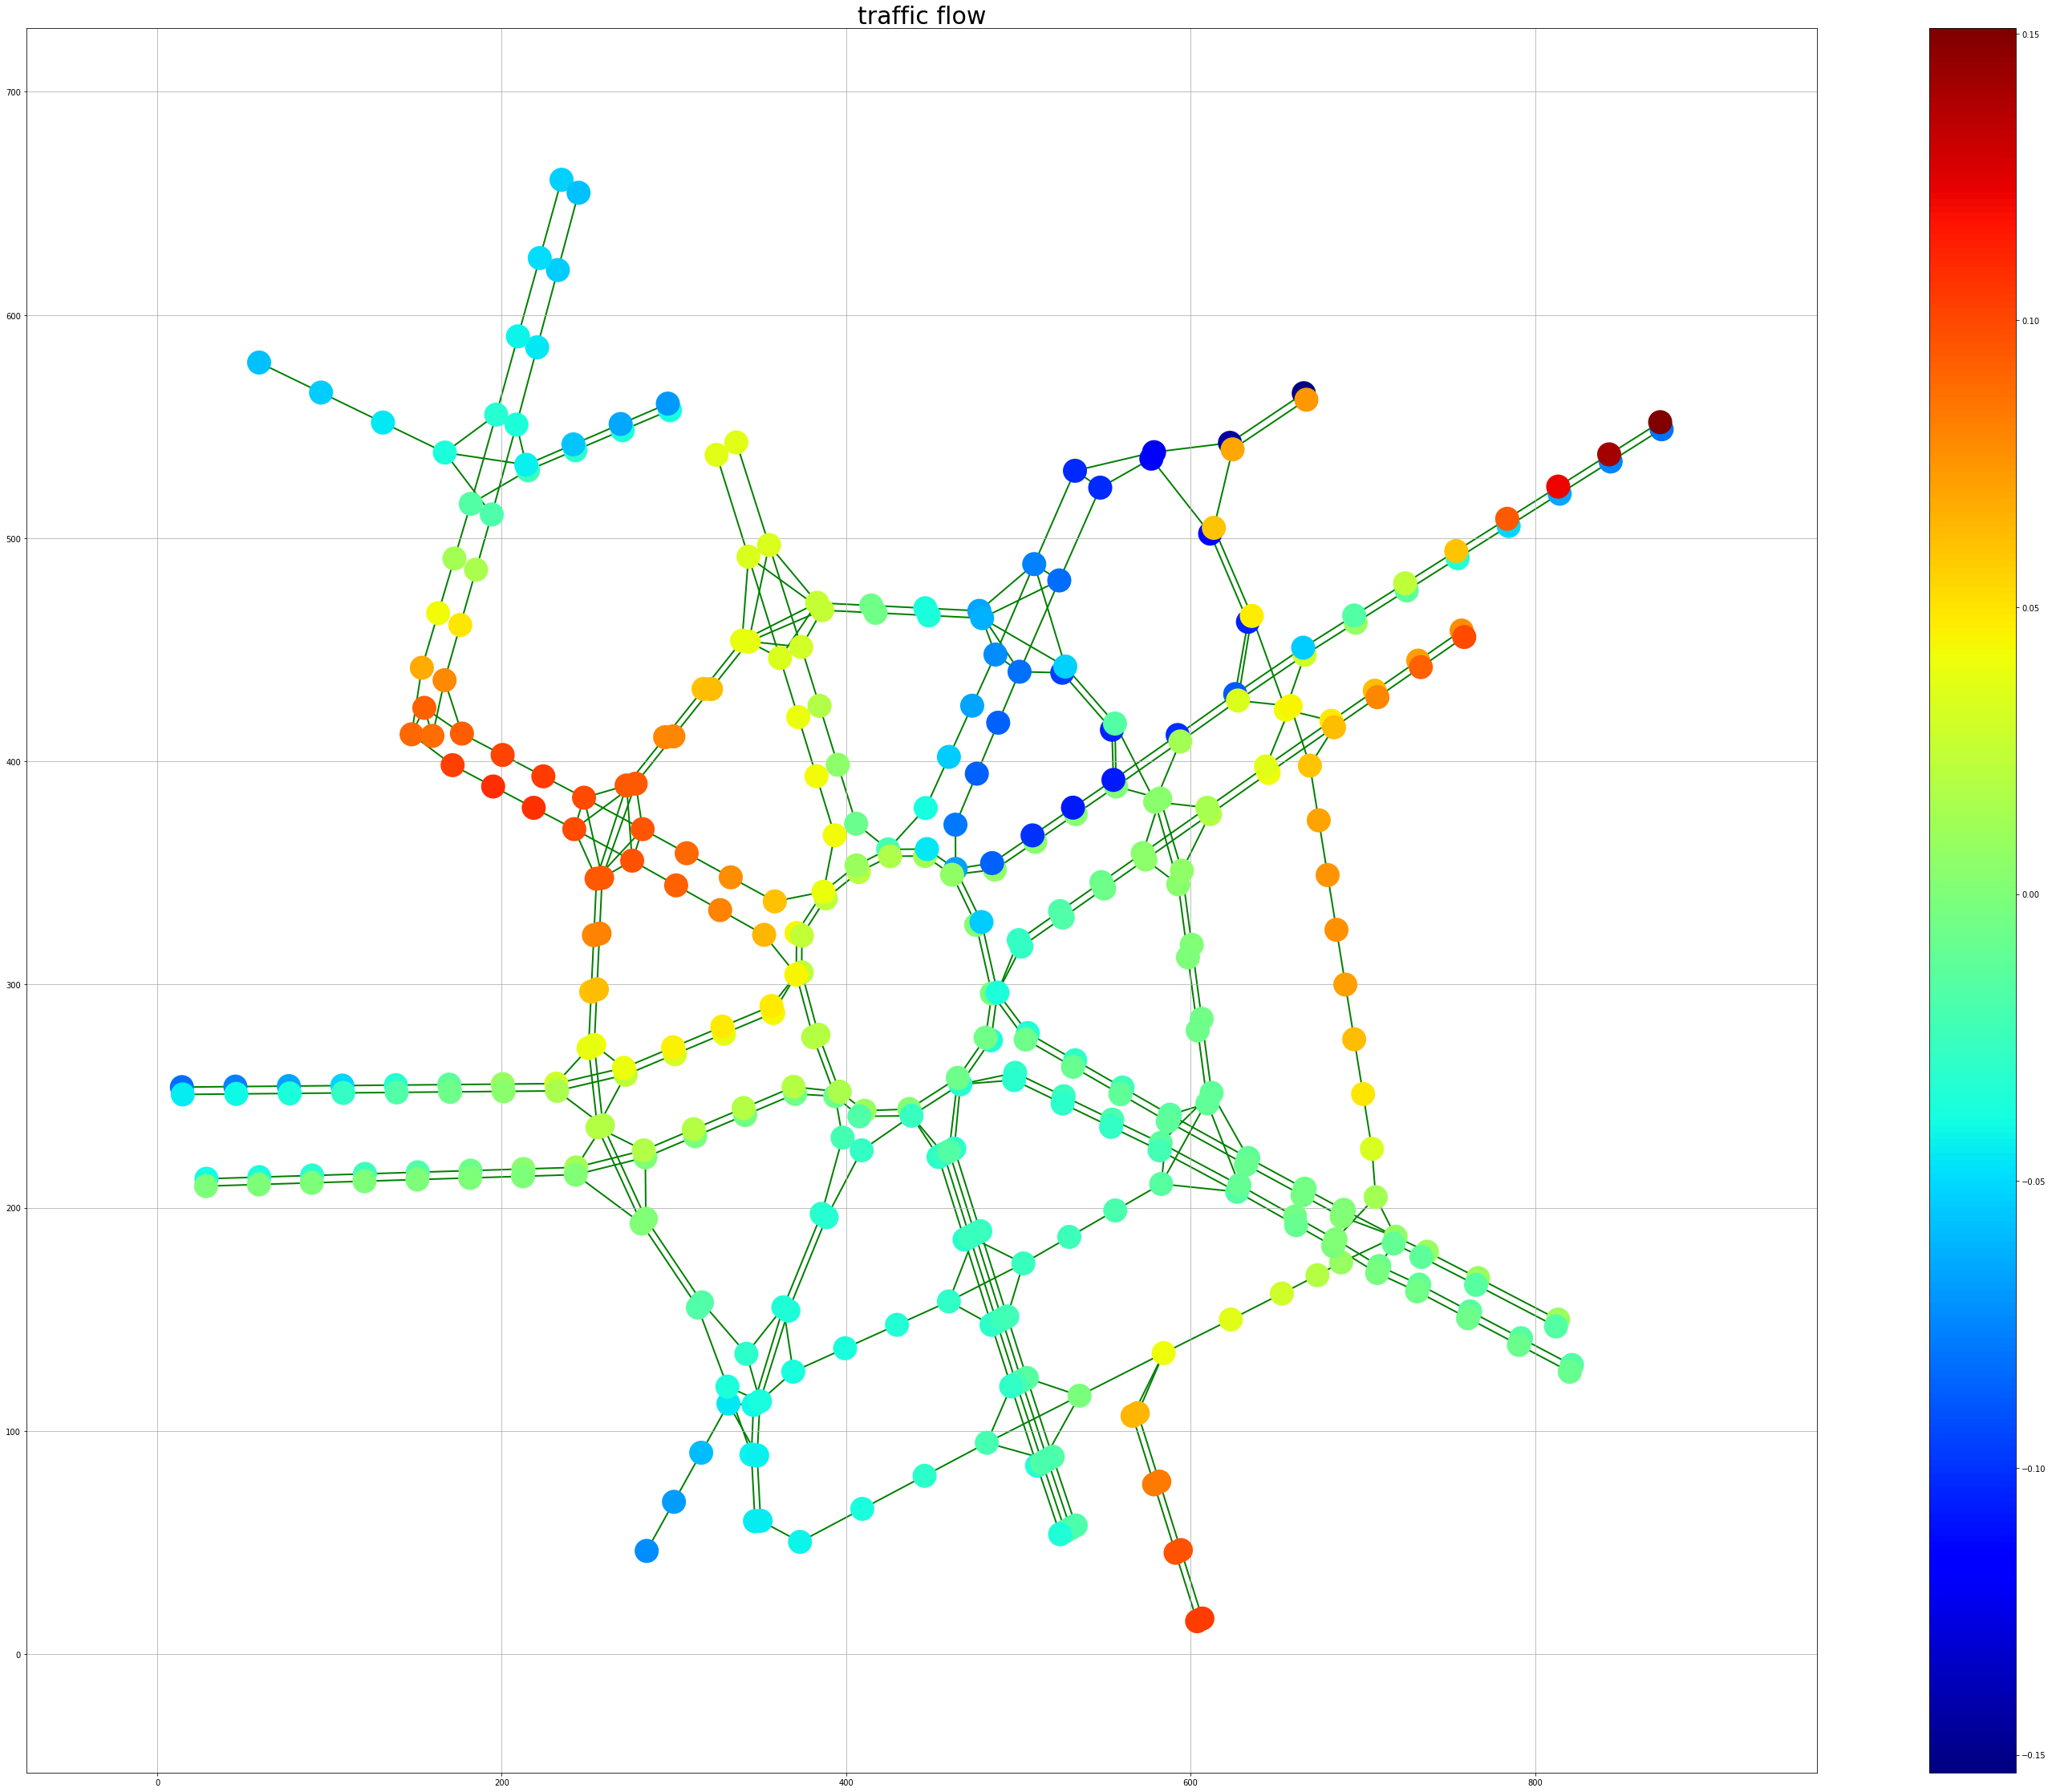

In [324]:
plt.figure(figsize=(50,40))

u=U[:,14]
c_min=min(u)
c_max=max(u)
nx.draw_networkx(graph_A, pos=xy, arrows=True, with_labels=False, edge_color="green", node_color=u, 
                 node_size=400, node_shape="o", font_size=30,
                    linewidths =10, width=2, cmap=plt.cm.jet, vmin=c_min, vmax=c_max)

cmap=plt.cm.jet
vmin = c_min
vmax = c_max
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array(u)
plt.colorbar(sm)
plt.title("traffic flow", fontsize=30)
plt.grid()
plt.show()

### check Laplacian

In [11]:
L_approx = np.dot(np.dot(U, np.diag(lambdas)), U.T)

In [12]:
L_approx[np.abs(L_approx) < np.exp(-16)] = 0

In [13]:
(L_approx - L).sum()

7.1831429693247628e-14

### graph Fourier transform

In [11]:
bandwidth = [10, 20, 30, 40, 50]

In [12]:
y_f = np.dot(U.conj().T, y)

In [13]:
y_f.shape

(376,)

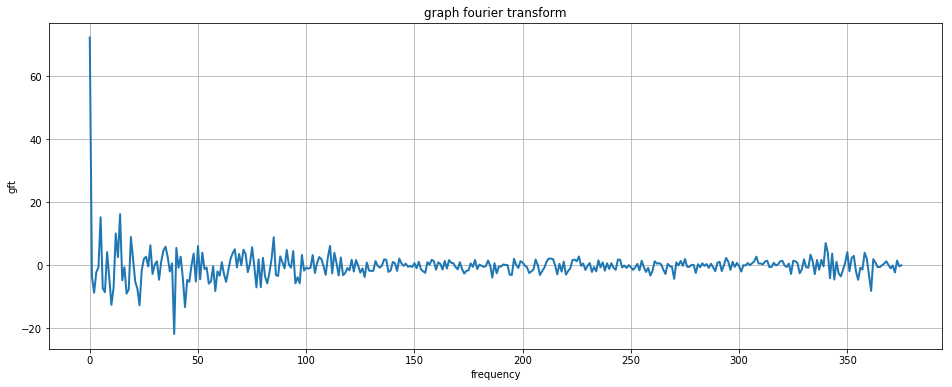

In [318]:
plt.figure(figsize=(16,6))
plt.plot(y_f, linewidth=2)
plt.title("graph fourier transform")
plt.ylabel("gft")
plt.xlabel("frequency")
plt.grid()

### sort by absolute value

In [14]:
y_f_sorted = [(i,np.abs(j)) for i,j in enumerate(y_f)]
y_f_sorted = sorted(y_f_sorted, key=lambda u:u[1], reverse=True)
F_global = [i[0] for i in y_f_sorted]

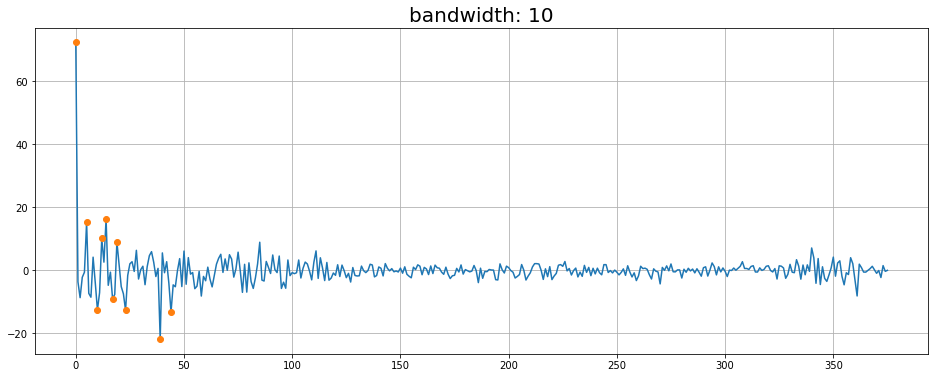

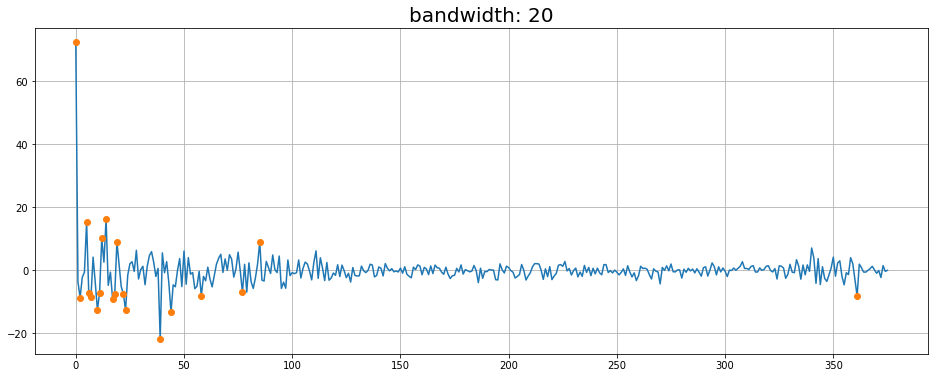

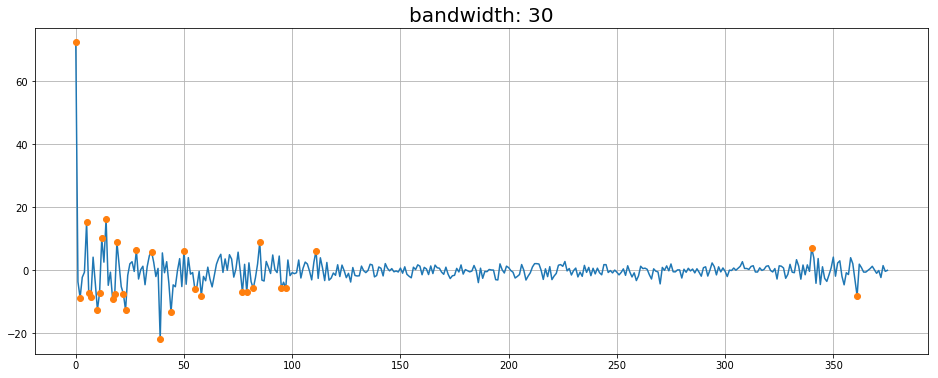

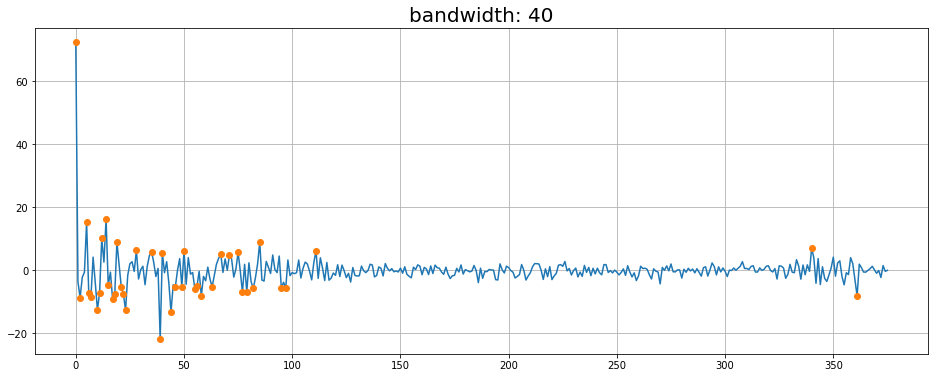

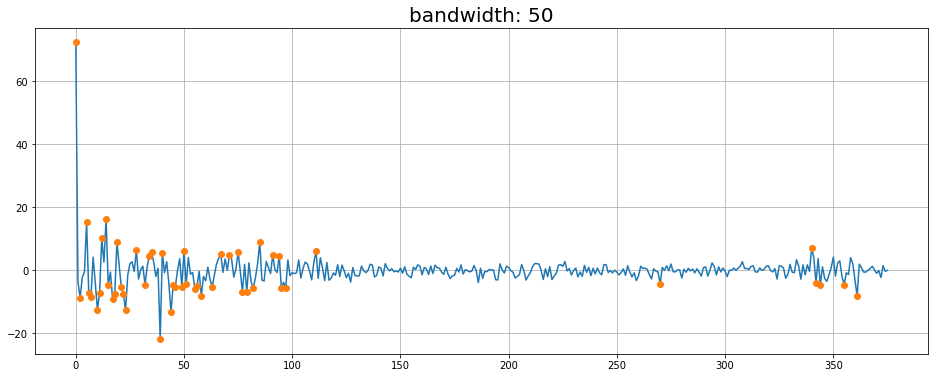

In [19]:
for b in bandwidth:

    plt.figure(figsize=(16,6))
    plt.plot(y_f)
    y_f_sample = np.zeros(len(y_f)) * np.NaN
    f_list = F_global[:b]
    y_f_sample[f_list] = y_f[f_list]
    plt.plot(y_f_sample, "o")
    plt.title("bandwidth: " + str(b), fontsize=20)
    plt.grid()

### noise vector

In [15]:
v = np.zeros(len(y)) #np.random.normal(0, 0.1, len(y))
v = v.reshape(len(v), 1)

# sampling techniques for signal reconstruction over graphs

* choose the best sampling set is a discrete combinatorial problem: an exaustive search is infeasible.
  To deal with the exponential complexity of this problem we have two possibilities:
  
  * greedy search
  * convex relaxation

in this work we concentrate our attention on different greedy strategy for local optimal solution.

### random choice for samples

In [16]:
def random_routine(U, bandwidth, y, F_global):

    Random = {b:[] for b in bandwidth}
    a = [i for i in range(len(y))]
    for b in bandwidth:

        F = b
        S = F + 3
        F_list = F_global[:F]
        Uf = U[:, F_list]
        
        index_list = np.random.choice(a, size=S, replace=False)
        print(index_list)
        y_reconstructed, y_sample, matrix_rec, y_sampled = y_reconstruction_routine(U, y, index_list, F_list)
        y_reconstructed[y_reconstructed < 0] = 0
        error = compute_error(y_reconstructed, y)

        Random[b] = [index_list, y_reconstructed, error, y_sample, matrix_rec, y_sampled]
        print(b)
    return Random

In [29]:
Random=random_routine(U, bandwidth, y, F_global)

[350  45 270  20 225   2 286 192 152  72 197 373 201]
Ok
10
[252  61  59  84 105 219 222 163 246 344 152 231  99 136 156 361 341 145
 118 279 199   5 151]
Ok
20
[368 350 207 130 144 131 133 302 256 101 356  59 357 160  47 230 175  53
 254  44  65 332 182 112  34 317 351 358 252  45 284  13  41]
Ok
30
[ 55  85 129  73  14 121 364 304  65 303 281  89 300 116  74 341 145 255
  13 301   3 348  84 302 336 344 307  57 201  35   6 239 224 120  90 268
 205 122 357 216 159 250  72]
40
[ 89  24 274 366 347 253  25 350 134 249 115   2  52  73  39  46 304 308
 344 151 295 259 346 179 354 214  94 271  57 332 125 293 283 233  13   6
  29  90  44 143 180 309 169 137 288 195 163 357 261 118 336  81  79]
Ok
50


In [30]:
index=["index_list", "y_reconstructed", "error", "y_sample", "matrix_rec", "y_sampled"]

In [31]:
Random_df=pd.DataFrame(Random, index=index)

### nmse random strategy 

In [33]:
Random_df.loc["error"]

10   -5.77632
20   -6.80159
30   -8.10383
40    212.721
50   -1.92956
Name: error, dtype: object

# E optimality

$$E_{opt} = argmax \, \sigma_{min}(D_S U_F)$$

$$E_{opt} = argmin \, \sigma_{max}(D_{SC} U_F)$$

# A optimality

$$A_{opt} = argmin \, Tr(U_F^T D_S R_v^{-1} U_F)^{-1}$$

# D optimality

$$D_{opt} = argmax \, log \,det(U_F^T D_S R_v^{-1} U_F)$$

### routine E optimality  without noise

In [34]:
def routine_without_noise(U, bandwidth, y, F_global):
    res = {b:[] for b in bandwidth}

    for b in bandwidth:

        F = b
        S = F + 3
        F_list = F_global[:F]
        Uf = U[:, F_list]

        index_list = greedy_e_opt(Uf, y, S)
        try:
            y_reconstructed, y_sample, matrix_rec, y_sampled = y_reconstruction_routine(U, y, index_list, F_list)
            print(index_list)
            y_reconstructed[y_reconstructed < 0] = 0
            error = compute_error(y_reconstructed, y)
        except np.linalg.LinAlgError:
            print("error")
            error=np.NaN
            y_reconstructed_e=np.NaN
            y_sample=np.NaN
            matrix_rec=np.NaN
            y_sampled=np.NaN

        res[b] = [index_list, y_reconstructed, error, y_sample, matrix_rec, y_sampled]
        print(b)
    return res

In [35]:
E_opt=routine_without_noise(U, bandwidth, y, F_global)

Ok
[52, 124, 99, 80, 36, 7, 134, 84, 114, 256, 150, 301, 15]
10
Ok
[87, 8, 11, 19, 3, 4, 5, 89, 52, 40, 152, 70, 62, 319, 294, 28, 101, 219, 167, 144, 193, 149, 341]
20
Ok
[13, 2, 19, 5, 42, 3, 107, 79, 0, 132, 189, 352, 144, 208, 46, 32, 18, 7, 20, 8, 147, 94, 158, 202, 23, 17, 138, 95, 73, 267, 255, 135, 330]
30
Ok
[1, 7, 5, 25, 49, 30, 62, 6, 107, 15, 52, 2, 53, 10, 33, 3, 22, 51, 31, 0, 29, 254, 24, 238, 143, 96, 80, 94, 108, 144, 111, 45, 17, 18, 297, 71, 16, 156, 218, 36, 239, 186, 298]
40
Ok
[277, 50, 55, 98, 71, 140, 195, 26, 25, 48, 81, 44, 20, 24, 63, 9, 21, 7, 2, 64, 124, 15, 14, 158, 19, 0, 5, 12, 168, 42, 1, 99, 28, 4, 3, 29, 228, 115, 202, 69, 111, 31, 243, 226, 105, 76, 354, 175, 371, 276, 166, 156, 153]
50


In [28]:
E_opt_df = pd.DataFrame(E_opt, index=index)

### nmse E optimality without noise

In [290]:
E_opt_df.loc["error"]

10   -5.77632
20   -7.08982
30   -7.80814
40   -8.26227
50   -8.11126
Name: error, dtype: object

### routine E/A/D optimality with noise

In [37]:
def routine_with_noise(U, bandwidth, y, F_global, v, t="e"):
    res_noise = {b:[] for b in bandwidth}

    for b in bandwidth:

        F = b
        S = F + 3
        F_list = F_global[:F]
        Uf = U[:, F_list]

        if t == "e":
            index_list = greedy_e_opt(Uf, y, S)
        elif t == "a":
            index_list = greedy_a_opt(Uf, y, S, v)
        elif t == "d":
            index_list = greedy_d_opt(Uf, y, S, v)
            
        try:
            y_reconstructed, y_sample, matrix_rec, y_sampled = y_reconstruction_routine_noise(U, y, index_list, F_list, v)
            y_reconstructed[y_reconstructed < 0] = 0
            print(index_list)
            error = compute_error(y_reconstructed, y)
        except np.linalg.LinAlgError:
            print("error")
            error=np.NaN
            y_reconstructed=np.NaN
            y_sample=np.NaN
            matrix_rec=np.NaN
            y_sampled=np.NaN
            
        res_noise[b] = [index_list, y_reconstructed, error, y_sample, matrix_rec, y_sampled]
        print(b)
    return res_noise

In [38]:
E_opt_noise=routine_with_noise(U, bandwidth, y, F_global, v, "e")

Ok
[52, 124, 99, 80, 36, 7, 134, 84, 114, 256, 150, 301, 15]
10
Ok
[87, 8, 11, 19, 3, 4, 5, 89, 52, 40, 152, 70, 62, 319, 294, 28, 101, 219, 167, 144, 193, 149, 341]
20
Ok
[13, 2, 19, 5, 42, 3, 107, 79, 0, 132, 189, 352, 144, 208, 46, 32, 18, 7, 20, 8, 147, 94, 158, 202, 23, 17, 138, 95, 73, 267, 255, 135, 330]
30
Ok
[1, 7, 5, 25, 49, 30, 62, 6, 107, 15, 52, 2, 53, 10, 33, 3, 22, 51, 31, 0, 29, 254, 24, 238, 143, 96, 80, 94, 108, 144, 111, 45, 17, 18, 297, 71, 16, 156, 218, 36, 239, 186, 298]
40
Ok
[277, 50, 55, 98, 71, 140, 195, 26, 25, 48, 81, 44, 20, 24, 63, 9, 21, 7, 2, 64, 124, 15, 14, 158, 19, 0, 5, 12, 168, 42, 1, 99, 28, 4, 3, 29, 228, 115, 202, 69, 111, 31, 243, 226, 105, 76, 354, 175, 371, 276, 166, 156, 153]
50


In [39]:
A_opt_noise=routine_with_noise(U, bandwidth, y, F_global, v, "a")

Ok
[212, 372, 366, 153, 228, 245, 354, 364, 154, 70, 215, 373, 36]
10
Ok
[347, 212, 374, 372, 76, 36, 368, 373, 106, 75, 29, 355, 301, 366, 100, 371, 156, 256, 31, 91, 316, 126, 215]
20
Ok
[347, 212, 374, 373, 300, 18, 76, 372, 36, 368, 100, 29, 106, 75, 26, 156, 371, 148, 199, 339, 284, 118, 263, 96, 355, 366, 72, 145, 313, 333, 192, 154, 41]
30
Ok
[347, 372, 371, 156, 374, 212, 18, 373, 300, 36, 76, 29, 197, 368, 75, 375, 199, 91, 245, 37, 184, 121, 100, 366, 146, 24, 166, 257, 266, 263, 118, 96, 102, 72, 174, 148, 341, 32, 155, 66, 192, 337, 26]
40
Ok
[347, 78, 372, 300, 371, 76, 374, 156, 36, 373, 212, 235, 75, 18, 29, 197, 121, 153, 100, 209, 253, 366, 375, 37, 91, 368, 32, 199, 365, 228, 184, 146, 188, 325, 166, 24, 298, 174, 181, 96, 118, 263, 278, 245, 70, 268, 335, 280, 171, 355, 275, 149, 144]
50


In [40]:
D_opt_noise=routine_with_noise(U, bandwidth, y, F_global, v, "d")

Ok
[366, 74, 211, 119, 100, 323, 267, 188, 253, 15, 153, 228, 245]
10
Ok
[374, 76, 164, 75, 106, 33, 373, 301, 366, 210, 99, 171, 122, 204, 92, 368, 372, 347, 26, 256, 36, 156, 355]
20
Ok
[374, 229, 212, 368, 100, 75, 76, 29, 68, 373, 268, 171, 266, 347, 118, 121, 15, 300, 316, 33, 152, 45, 96, 162, 355, 159, 371, 174, 181, 284, 372, 148, 228]
30
Ok
[374, 91, 167, 372, 76, 375, 29, 371, 65, 368, 211, 139, 349, 151, 266, 352, 18, 119, 33, 156, 36, 233, 364, 212, 130, 313, 158, 142, 347, 264, 117, 147, 344, 301, 339, 107, 24, 95, 171, 124, 325, 72, 26]
40
Ok
[374, 177, 153, 76, 61, 368, 164, 18, 117, 372, 78, 347, 106, 239, 178, 209, 190, 266, 197, 11, 29, 358, 165, 216, 133, 58, 371, 289, 208, 300, 30, 171, 235, 138, 182, 124, 75, 373, 158, 7, 94, 352, 370, 121, 69, 160, 228, 35, 196, 212, 284, 98, 146]
50


In [41]:
E_opt_noise_df=pd.DataFrame(E_opt_noise, index=index)
A_opt_noise_df=pd.DataFrame(A_opt_noise, index=index)
D_opt_noise_df=pd.DataFrame(D_opt_noise, index=index)

### nmse E optimality with noise

In [42]:
E_opt_noise_df.loc["error"]

10   -5.77632
20   -7.08982
30   -7.80814
40   -8.26227
50   -8.11126
Name: error, dtype: object

### nmse A optimality with noise

In [43]:
A_opt_noise_df.loc["error"]

10   -5.75337
20   -6.81159
30   -8.02013
40   -8.97872
50   -9.78373
Name: error, dtype: object

### nmse D optimality with noise

In [44]:
D_opt_noise_df.loc["error"]

10   -5.75039
20   -7.03989
30   -8.08595
40   -8.84221
50   -9.72069
Name: error, dtype: object

### plot nmse vs bandwidth for different greedy strategy

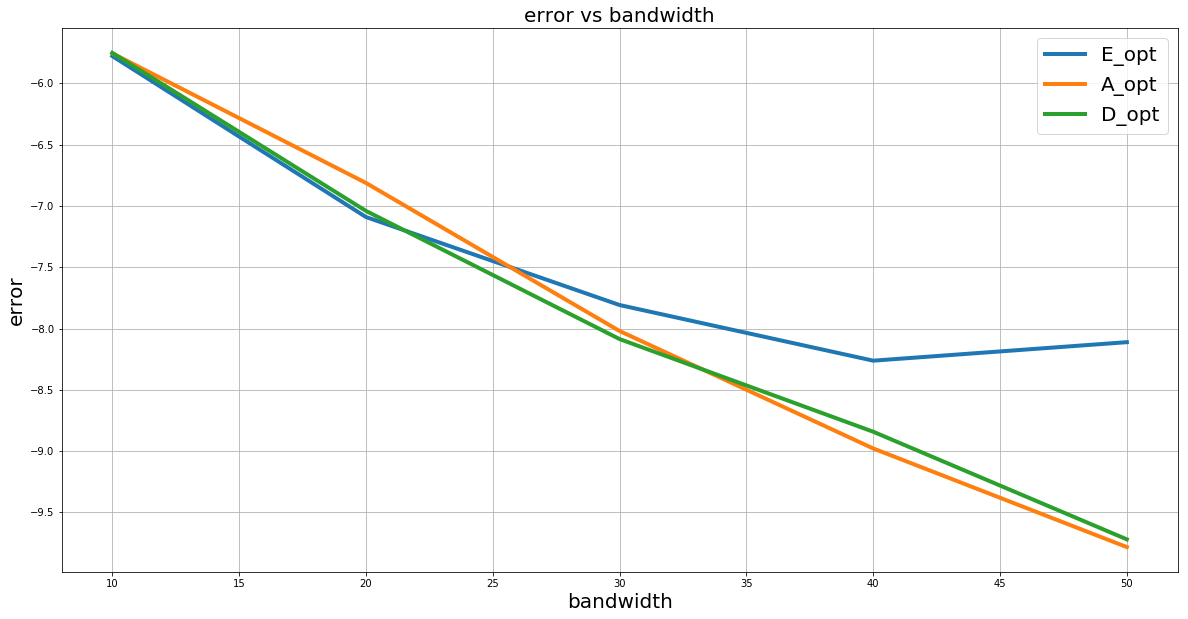

In [284]:
plt.figure(figsize=(20,10))
#r = [Random[b][2] for b in bandwidth]
e = [E_opt_noise[b][2] for b in bandwidth]
a = [A_opt_noise[b][2] for b in bandwidth]
d = [D_opt_noise[b][2] for b in bandwidth]
#plt.plot(bandwidth, r)
plt.plot(bandwidth, e, linewidth=4)
plt.plot(bandwidth, a, linewidth=4)
plt.plot(bandwidth, d, linewidth=4)
plt.legend(["E_opt", "A_opt", "D_opt"], fontsize=20)
plt.title("error vs bandwidth", fontsize=20)
plt.xlabel("bandwidth", fontsize=20)
plt.ylabel("error", fontsize=20)
#plt.ylim([-10,0])
plt.grid()
#plt.savefig("error_bandwidth.pdf", format="pdf")

given a noisy sample

$$y_S = P_S^T (x + v) = P_S^T U_F \, s_F + P_S^T v$$

$y_S$ has to be not null for every given $s_F$: this means full rank columns for $P_S^T U_F$ and the necessary condition $$|S| \geq |F|$$

and using the reconstruction formula we can obtain the reconstructed signal

$$\bar{x} = [ U_F (U_F^T P_S (P_S^T R_v P_S)^{-1} P_S^T U_F)^{-1} U_F^T P_S (P_S^T R_v P_S)^{-1} ] \, y_S$$

### E optimality reconstruction

In [121]:
def sampling_reconstruction(opt_noise, y, bandwidth, t="E"):
    for b in bandwidth:
        plt.figure(figsize=(16,6))
        y_reconstructed=opt_noise[b][1]
        y_sample=opt_noise[b][3]
        error=opt_noise[b][2]
        plt.grid()
        plt.plot(y, linewidth=2, color="green")
        plt.plot(y_reconstructed, color="red", linewidth=4)
        plt.plot(y_sample, "o", color="blue")
        plt.ylim([-1, 15])
        plt.legend(["original", "reconstructed", "sample"], fontsize=10)
        plt.title(str(t) + "_opt_noise | bandwidth " + str(b) + " | samples " + str(b+3) + " | nmse " + str(error), fontsize=20)

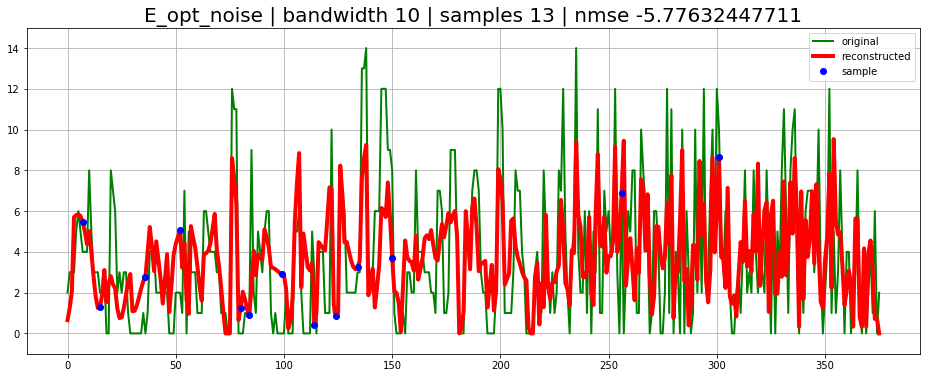

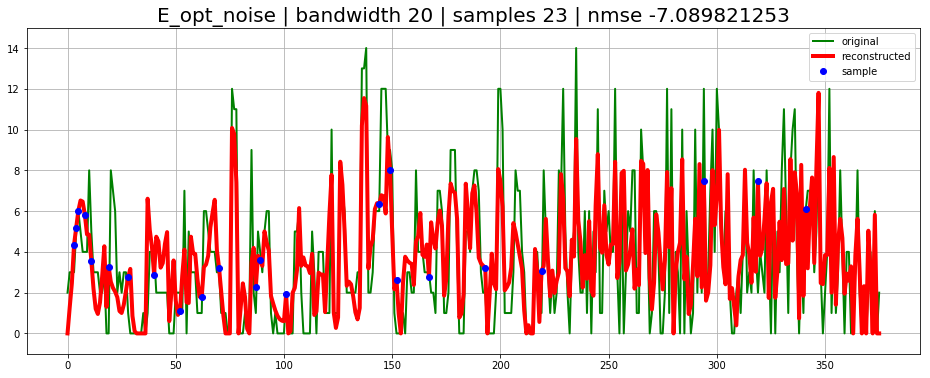

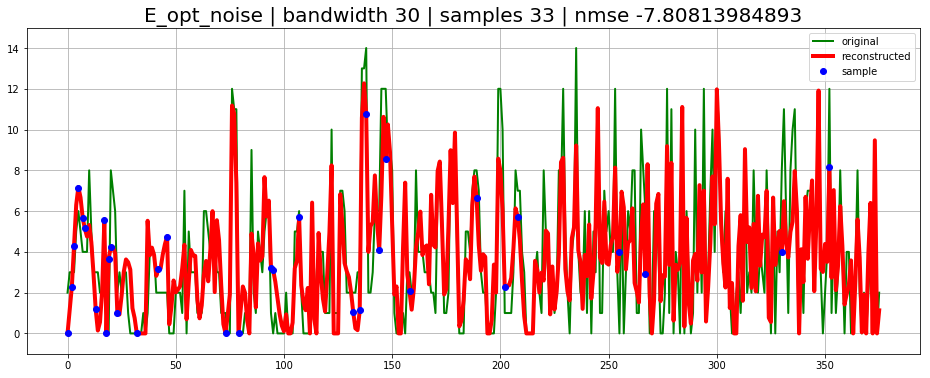

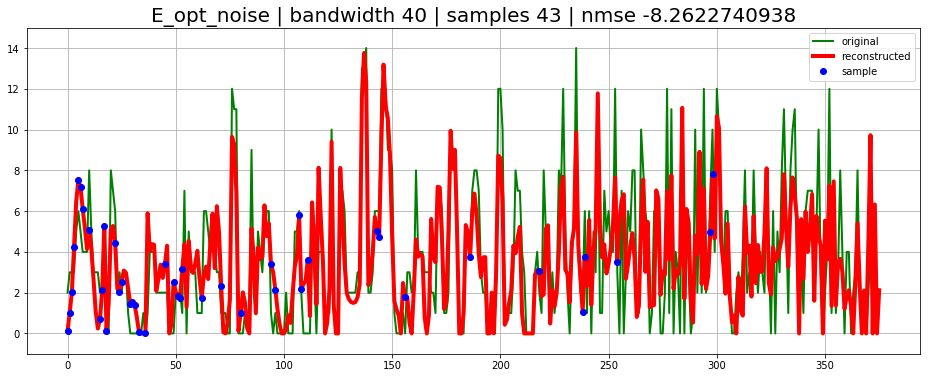

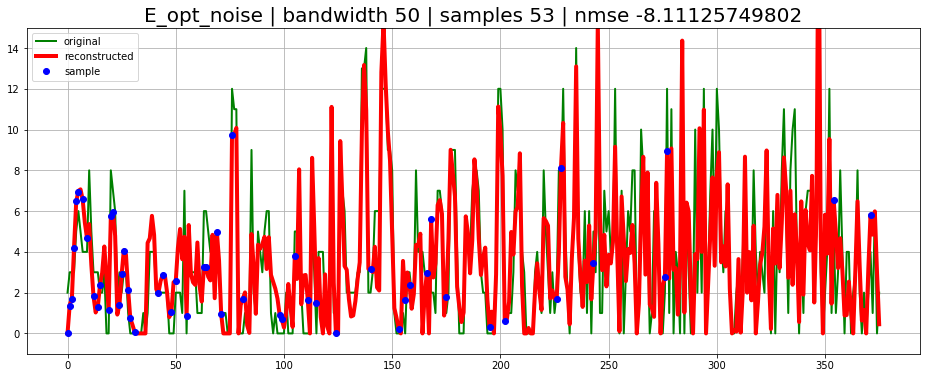

In [122]:
sampling_reconstruction(E_opt_noise, y, bandwidth, "E")

### A optimality reconstruction

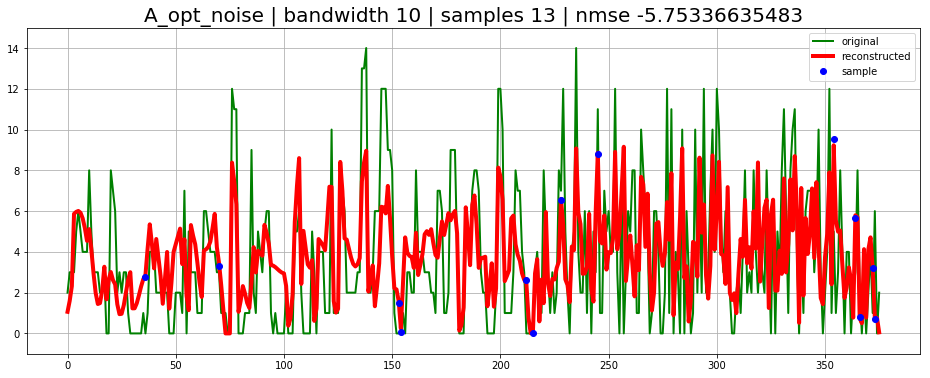

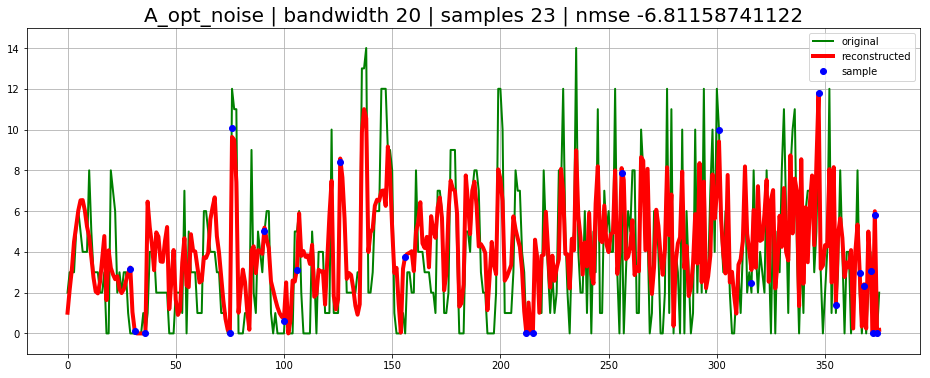

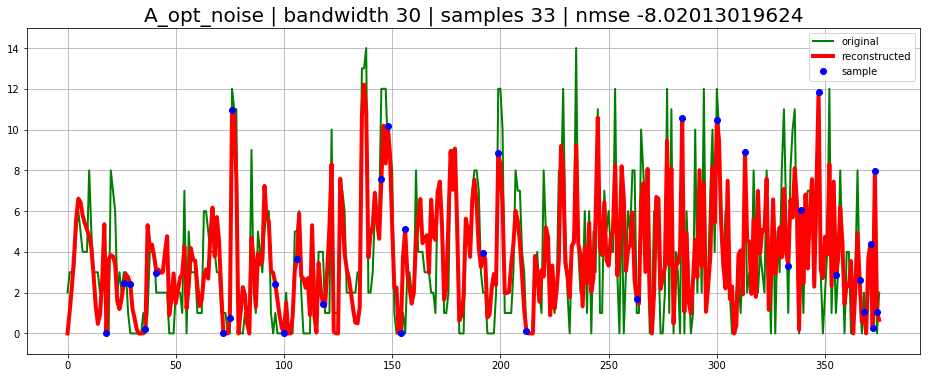

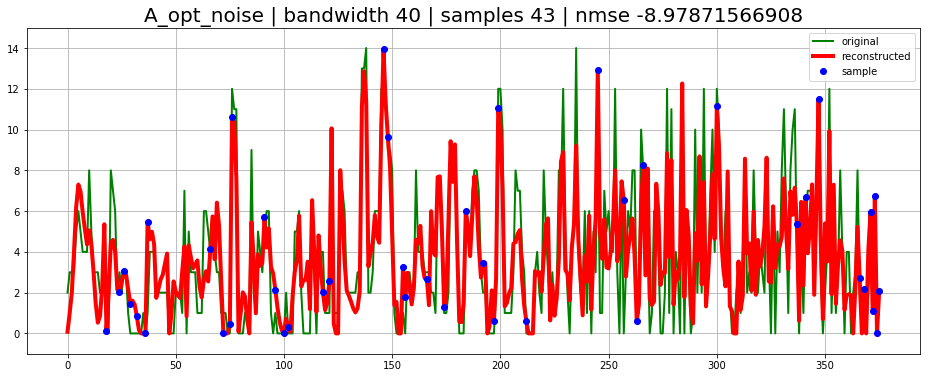

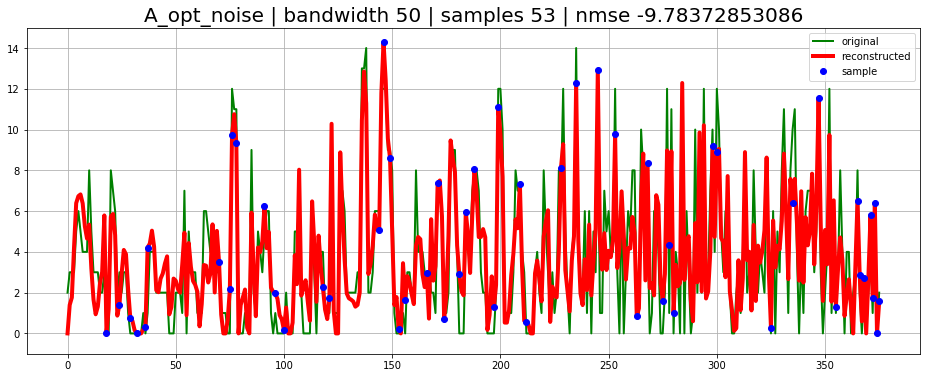

In [74]:
sampling_reconstruction(A_opt_noise, y, bandwidth, "A")

### D optimality reconstruction

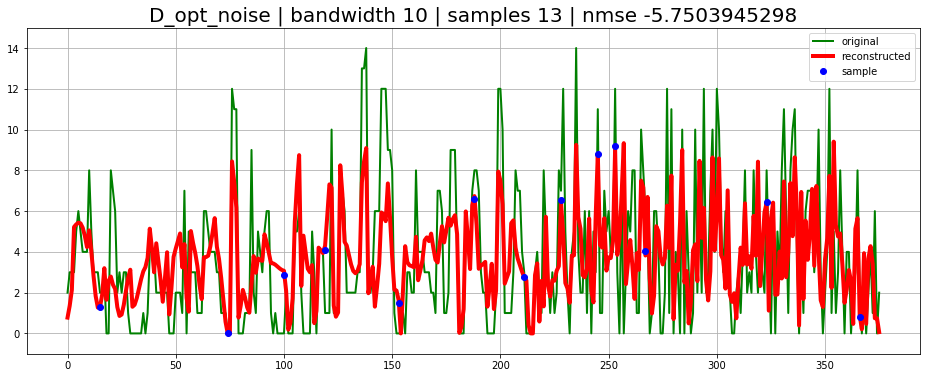

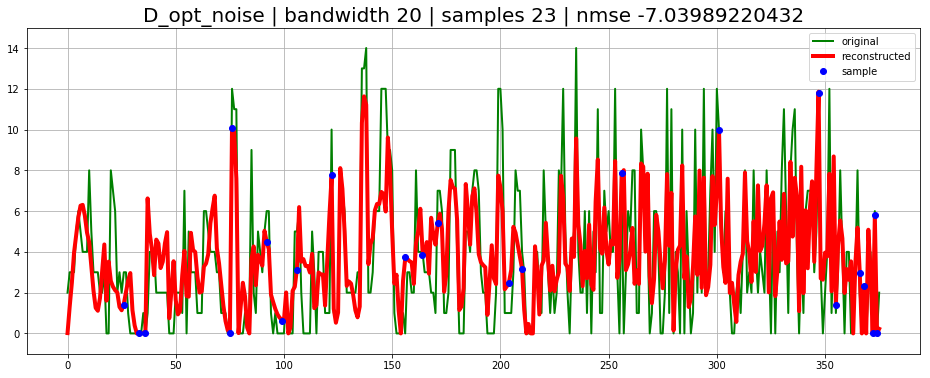

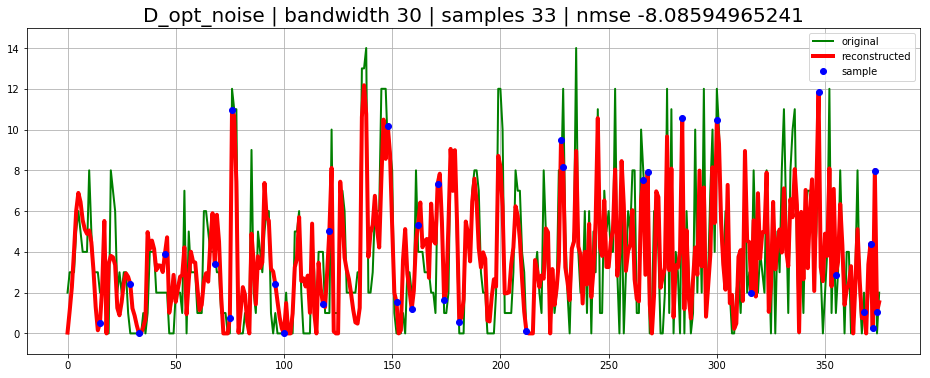

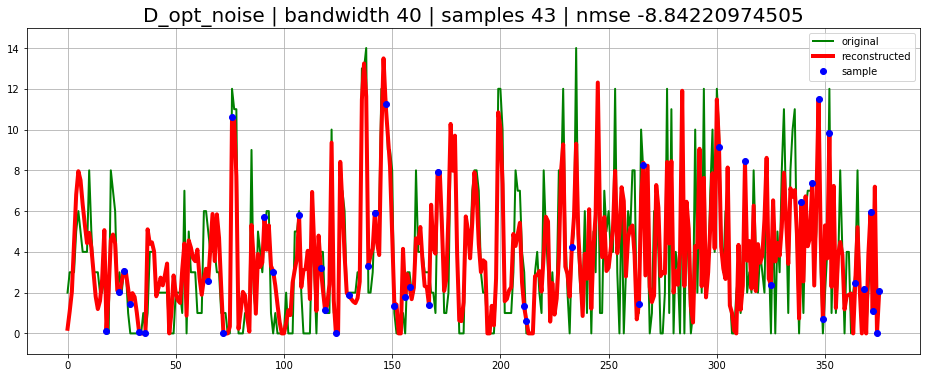

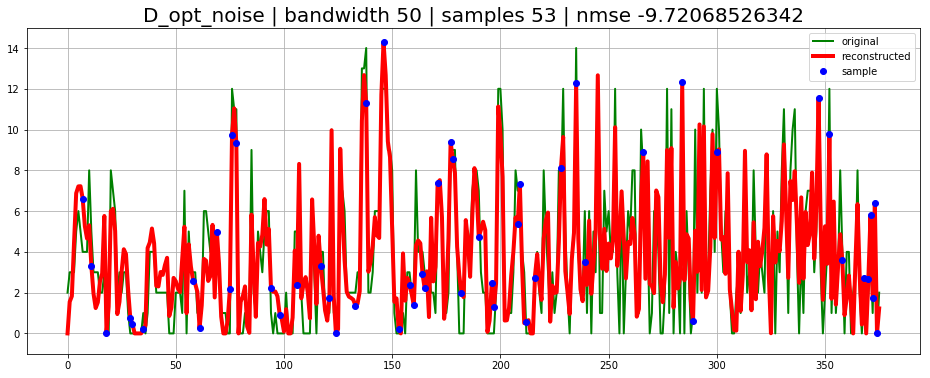

In [75]:
sampling_reconstruction(D_opt_noise, y, bandwidth, "D")

### comparison sampling and reconstruction for different greedy strategy

In [76]:
def sampling_visualization(E_opt_noise, A_opt_noise, D_opt_noise, b, title):
    plt.figure(figsize=(16,6))
    
    yE_reconstructed=E_opt_noise[b][1]
    yE_sample = E_opt_noise[b][3]

    yD_reconstructed=D_opt_noise[b][1]
    yD_sample = D_opt_noise[b][3]

    yA_reconstructed=A_opt_noise[b][1]
    yA_sample = A_opt_noise[b][3]

    plt.plot(yA_reconstructed)
    plt.plot(yE_reconstructed)
    plt.plot(yD_reconstructed)
    plt.plot(yA_sample, "o")
    plt.plot(yE_sample, "o")
    plt.plot(yD_sample, "o")
    plt.legend(["A_rec","E_rec","D_rec","a", "e", "d"])
    plt.ylim([-1, 15])
    plt.title(title, fontsize=20)
    plt.grid()

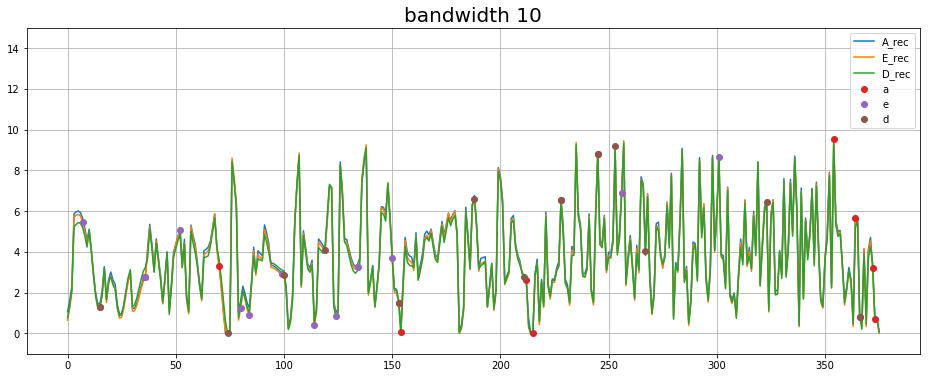

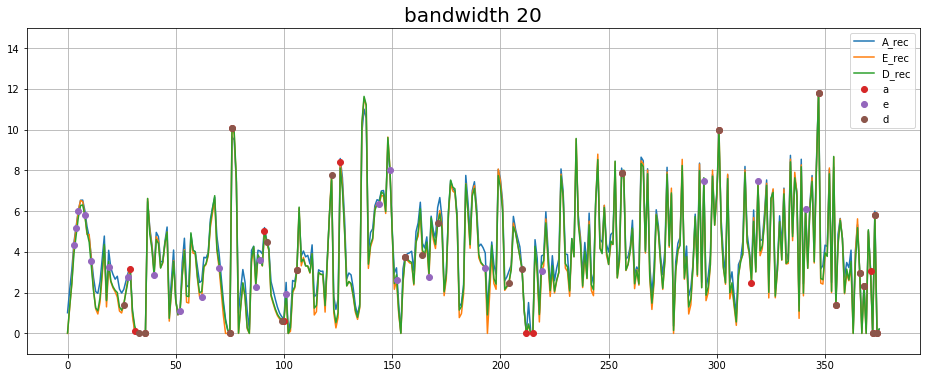

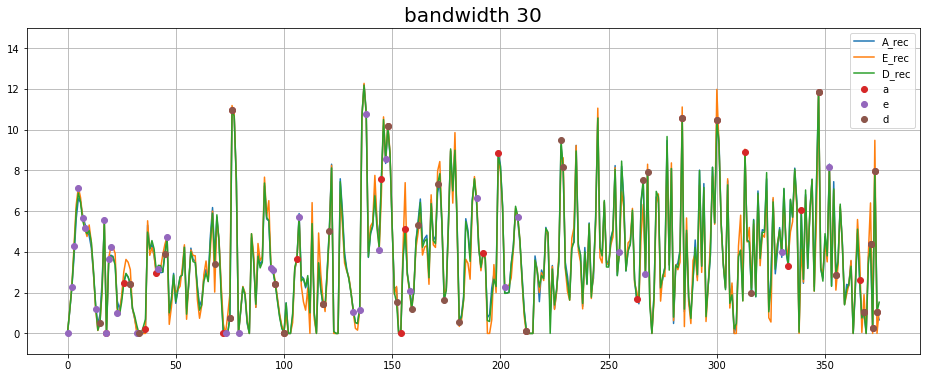

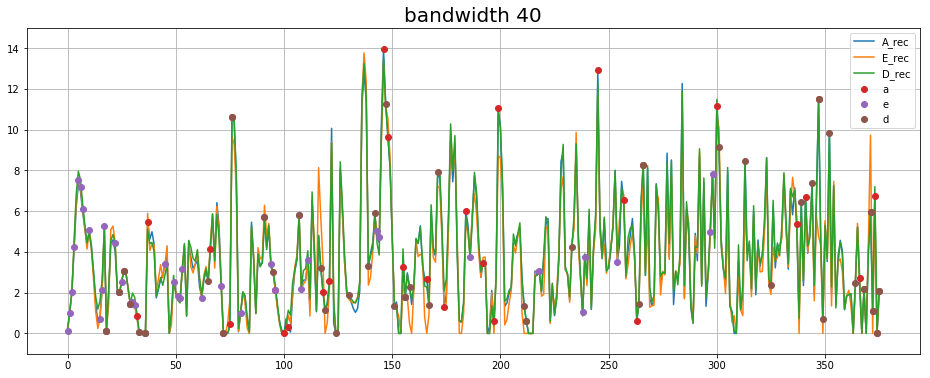

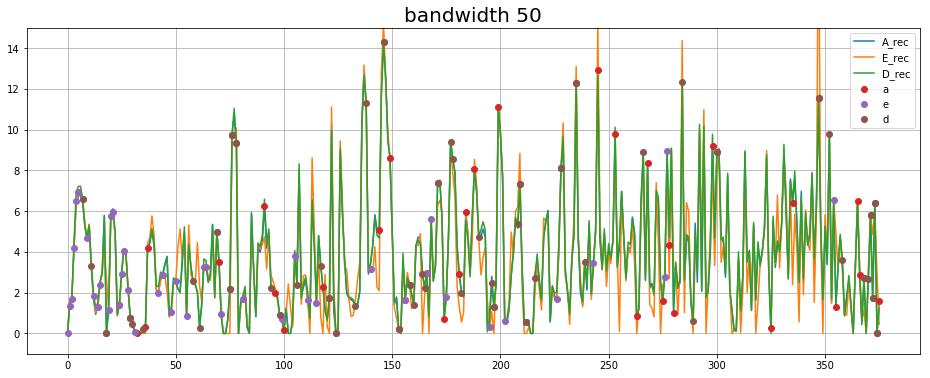

In [77]:
for b in bandwidth:
    sampling_visualization(E_opt_noise, A_opt_noise, D_opt_noise, b, "bandwidth " + str(b))

### visualization sampling over graph

In [106]:
def sampling_graph_visualization(opt_noise, y, bandwidth, t="E"):

    for b in bandwidth:
        plt.figure(figsize=(20,10))
        
        index_list = opt_noise[b][0]
        y_sample = y[index_list]
        xx=Px[index_list]
        yy=Py[index_list]
        
        plt.scatter(Px, Py, s=y*100, marker="o", color="green")
        plt.scatter(xx, yy, s=y_sample*100, marker="o", color="red")
        plt.grid()
        plt.title(str(t) + "_opt_noise | bandwidth " + str(b) + " | samples " + str(b+3),  fontsize=20)
        plt.show()

In [158]:
#sampling_graph_visualization(E_opt_noise, y, bandwidth, t="E")

### visualization sampling and reconstruction 

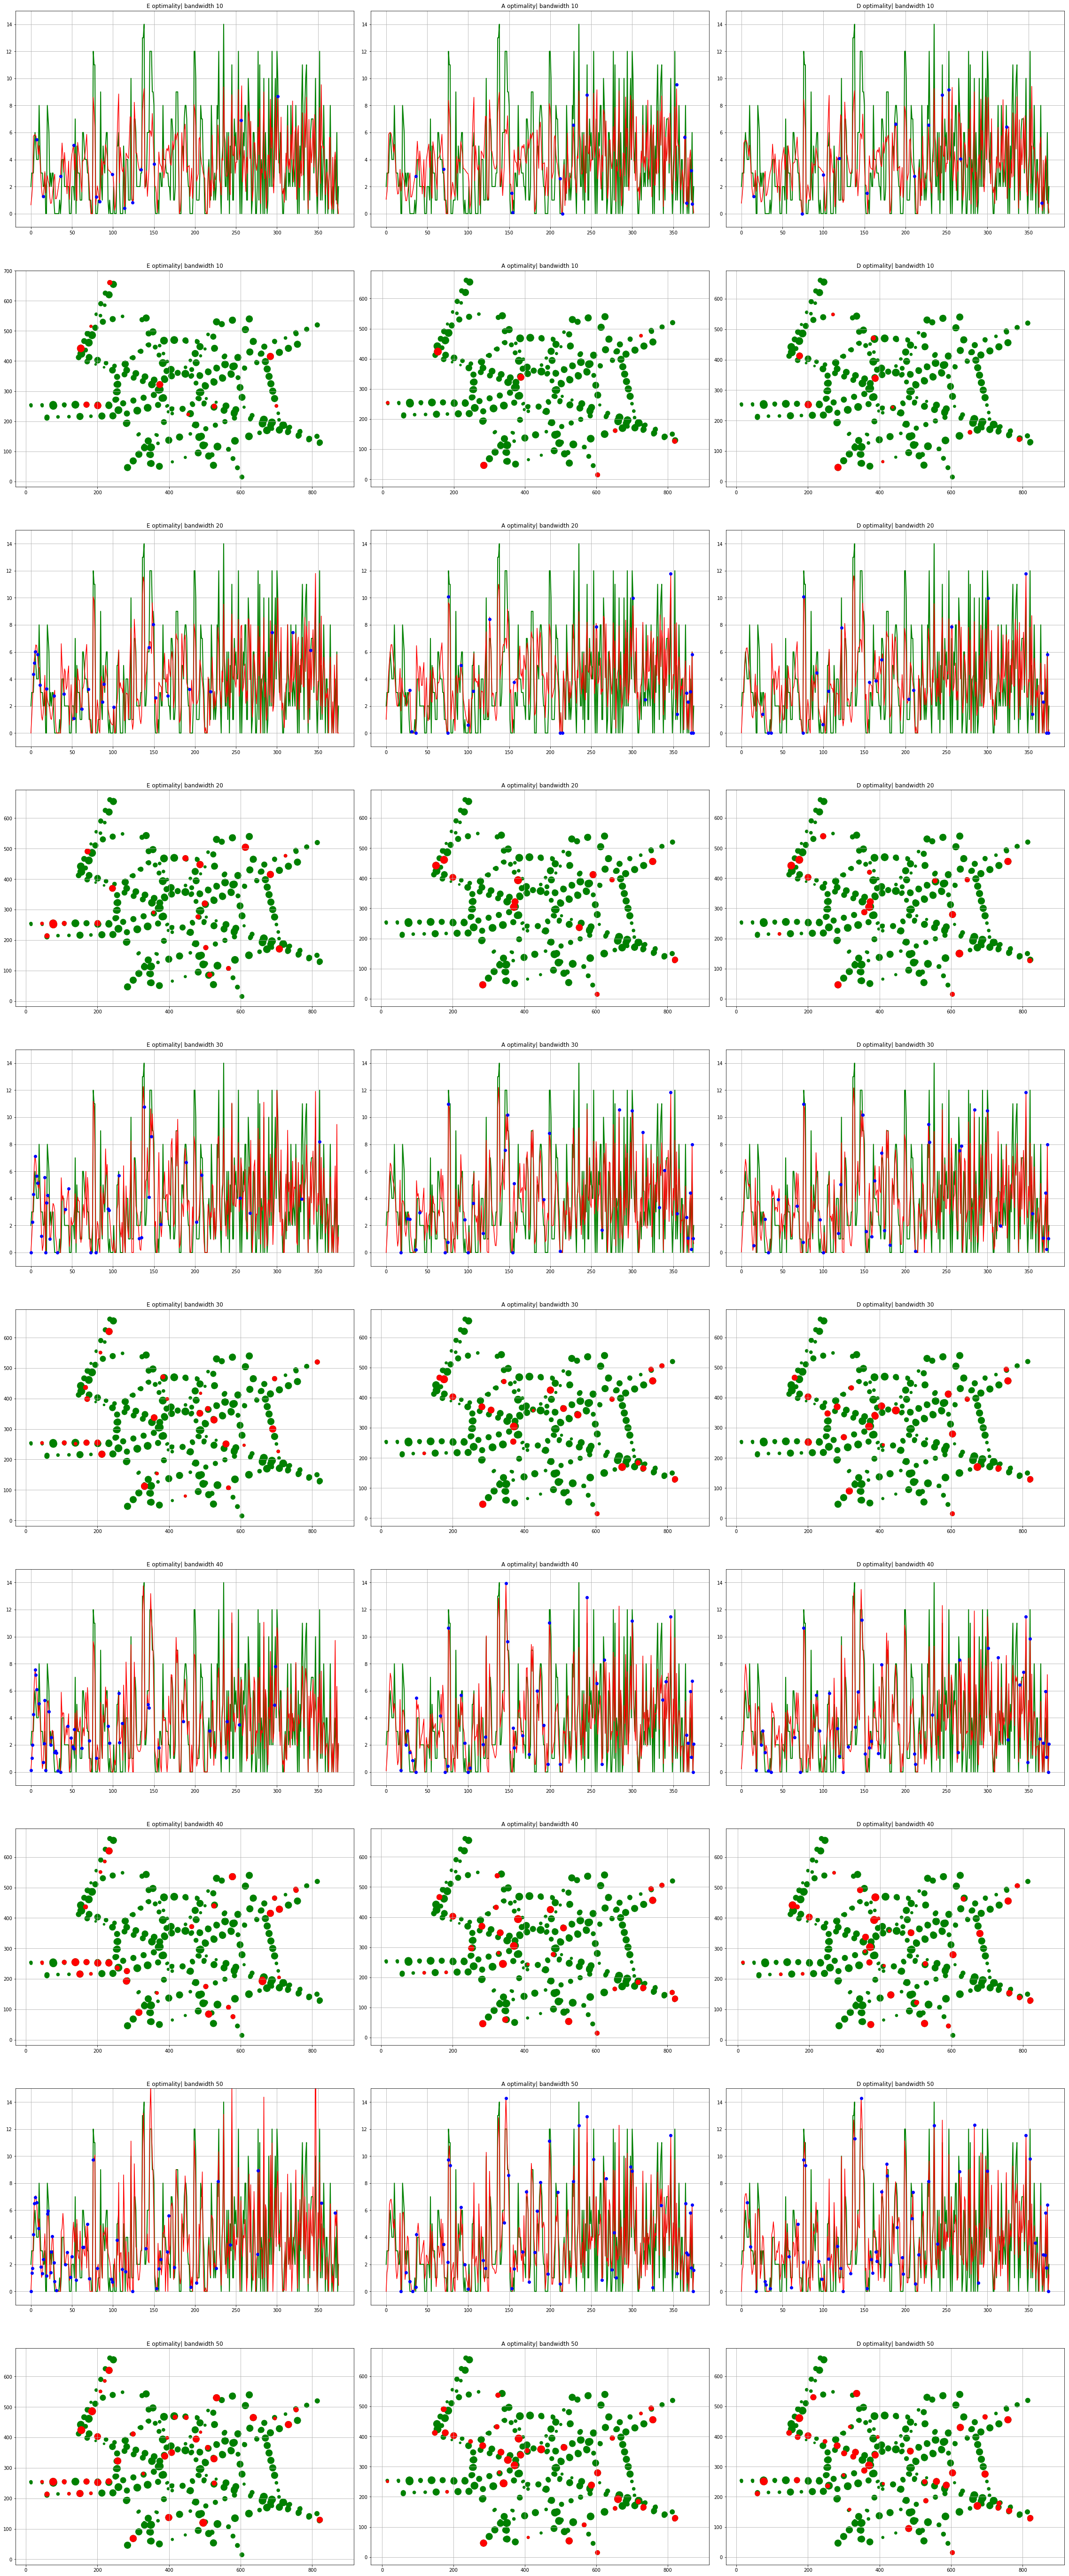

In [156]:
fig, axs = plt.subplots(2*len(bandwidth), 3, figsize=(40,100))
fig.subplots_adjust(hspace = .2, wspace=.05)

for b in range(0, 2*len(bandwidth), 2):
    
    band = bandwidth[b//2]
    
    y_reconstructed=E_opt_noise[band][1]
    y_sample=E_opt_noise[band][3]
    error=E_opt_noise[band][2]
    axs[b, 0].plot(y, linewidth=2, color="green")
    axs[b, 0].plot(y_reconstructed, color="red")
    axs[b, 0].plot(y_sample, "o", color="blue")
    axs[b, 0].set_title("E optimality| bandwidth " + str(band), fontsize=20)
    axs[b, 0].set_ylim([-1, 15])
    axs[b, 0].grid()
    
    index_list = E_opt_noise[band][0]
    y_sample = y[index_list]
    xx=Px[index_list]
    yy=Py[index_list]
    axs[b+1, 0].scatter(Px, Py, s=y*100, marker="o", color="green")
    axs[b+1, 0].scatter(xx, yy, s=y_sample*100, marker="o", color="red")
    axs[b+1, 0].set_title("E optimality| bandwidth " + str(band), fontsize=20)
    axs[b+1, 0].grid()
    
    y_reconstructed=A_opt_noise[band][1]
    y_sample=A_opt_noise[band][3]
    error=A_opt_noise[band][2]
    axs[b, 1].plot(y, linewidth=2, color="green")
    axs[b, 1].plot(y_reconstructed, color="red")
    axs[b, 1].plot(y_sample, "o", color="blue")
    axs[b, 1].set_title("A optimality| bandwidth " + str(band), fontsize=20)
    axs[b, 1].set_ylim([-1, 15])
    axs[b, 1].grid()
    
    index_list = A_opt_noise[band][0]
    y_sample = y[index_list]
    xx=Px[index_list]
    yy=Py[index_list]
    axs[b+1, 1].scatter(Px, Py, s=y*100, marker="o", color="green")
    axs[b+1, 1].scatter(xx, yy, s=y_sample*100, marker="o", color="red")
    axs[b+1, 1].set_title("A optimality| bandwidth " + str(band), fontsize=20)
    axs[b+1, 1].grid()
    
    y_reconstructed=D_opt_noise[band][1]
    y_sample=D_opt_noise[band][3]
    error=D_opt_noise[band][2]
    axs[b, 2].plot(y, linewidth=2, color="green")
    axs[b, 2].plot(y_reconstructed, color="red")
    axs[b, 2].plot(y_sample, "o", color="blue")
    axs[b, 2].set_title("D optimality| bandwidth " + str(band), fontsize=20)
    axs[b, 2].set_ylim([-1, 15])
    axs[b, 2].grid()
    
    index_list = D_opt_noise[band][0]
    y_sample = y[index_list]
    xx=Px[index_list]
    yy=Py[index_list]
    axs[b+1, 2].scatter(Px, Py, s=y*100, marker="o", color="green")
    axs[b+1, 2].scatter(xx, yy, s=y_sample*100, marker="o", color="red")
    axs[b+1, 2].set_title("D optimality| bandwidth " + str(band), fontsize=20)
    axs[b+1, 2].grid()

In [ ]:
def solver(A, y):
    n, m= A.shape
    x = Variable(m)
    b = y[:]
    objective = Minimize(sum_squares(A*x - b))
    constraints = [x >= 0]
    prob = Problem(objective, constraints)
    result = prob.solve()
    x = np.array(x.value)
    new = np.dot(A, x)
    new = [i[0] for i in new]
    return new

In [ ]:
for b in bandwidth:
    
    e = E_opt_noise[b][2]
    Ae = E_opt_noise[b][4]
    new = solver(Ae, y)
    new_e = compute_error(new, y)
    print("E_optimality","bandwidth: " + str(b), "greedy_error: " + str(e), "relaxed_error: " + str(new_e))
    
    a = A_opt_noise[b][2]
    Aa = A_opt_noise[b][4]
    new = solver(Aa, y)
    new_a = compute_error(new, y)
    print("A_optimality","bandwidth: " + str(b), "greedy_error: " + str(a), "relaxed_error: " + str(new_a))
    
    d = D_opt_noise[b][2]
    Ad = D_opt_noise[b][4]
    new = solver(Ad, y)
    new_d = compute_error(new, y)
    print("D_optimality","bandwidth: " + str(b), "greedy_error: " + str(d), "relaxed_error: " + str(new_d))
    print()  

### convex relaxation for D optimality with cvxpy

we solve a convex constrained minimization problem

objective function : $$-log( det( U_F^T diag(d) R_v^{-1} U_F ) )$$
constraints : $$1^T d = S, d \in \{0,1\}$$ 

In [188]:
def objective_function(x, Uf, Uft, Rv_inv, flag):
    if flag == "d":
        matrix = -log_det(Uft * diag(x) * Rv_inv * Uf)
    if flag == "a":
        matrix = trace(inv(Uft * diag(x) * Rv_inv * Uf)) ### inv?
    if flag == "e":
        matrix = -sqrt(sigma_min(diag(x) * Uf)) ### sigma_min?
    return matrix

In [189]:
def optimization_routine(U, m, B, F_list, v, flag):
    Uf = U[:, F_list]
    Uft = Uf.T
    Rv_inv = np.diag(np.ones(len(v))) 
    S = B + 3
    x = Variable(m)
    obj = objective_function(x, Uf, Uft, Rv_inv, flag)
    objective = Minimize(obj)
    constraints = [sum_entries(x) == S, 0 <= x, x <= 1]
    prob = Problem(objective, constraints)
    result = prob.solve()
    x = np.array(x.value)
    return x

In [190]:
def index_selection(x, B):
    S=B+3
    new = [ (i[0], j) for j, i in enumerate(x)]
    new = sorted(new, reverse=True)
    index_list = [i[1] for i in new[:S]]
    return index_list

In [191]:
def relaxed_solver(U, y, m, B, F_list, v, flag):
    x = optimization_routine(U, m, B, F_list, v, flag)
    index_list = index_selection(x, B)
    y_r, y_sample, matrix_rec, y_sampled = y_reconstruction_routine_noise(U, y, index_list, F_list, v)
    return y_r

In [195]:
for b in bandwidth:
    m = len(y)
    F_list = F_global[:b]
    
#     e = E_opt_noise[b][2]
#     new = relaxed_solver(U, y, m, B, F_list, v, "d")
#     new_e = compute_error(new, y)
#     print("E_optimality","bandwidth: " + str(b), "greedy_error: " + str(e), "relaxed_error: " + str(new_e))
    
#     a = A_opt_noise[b][2]
#     new = relaxed_solver(U, y, m, B, F_list, v, "d")
#     new_a = compute_error(new, y)
#     print("A_optimality","bandwidth: " + str(b), "greedy_error: " + str(a), "relaxed_error: " + str(new_a))
    
    d = D_opt_noise[b][2]
    new = relaxed_solver(U, y, m, B, F_list, v, "d")
    new_d = compute_error(new, y)
    print("D_optimality","bandwidth: " + str(b), "greedy_error: " + str(d), "relaxed_error: " + str(new_d))
    print()  

Ok
D_optimality bandwidth: 10 greedy_error: -5.7503945298 relaxed_error: -5.75311558587

Ok
D_optimality bandwidth: 20 greedy_error: -7.03989220432 relaxed_error: -6.96818870479

Ok
D_optimality bandwidth: 30 greedy_error: -8.08594965241 relaxed_error: -7.99809940285

Ok
D_optimality bandwidth: 40 greedy_error: -8.84220974505 relaxed_error: -8.86498001711

Ok
D_optimality bandwidth: 50 greedy_error: -9.72068526342 relaxed_error: -9.68030672747

